In [127]:
!pip install plotly

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from scipy.stats import kstest, normaltest, anderson, shapiro, mannwhitneyu, kruskal, norm, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from skimpy import skim
import plotly.express as px


# Importar la base de datos

In [180]:
#pd.set_option('display.max_columns', None)
data = pd.read_csv('mobile_data.csv')

In [181]:
# Filtrar las 14 variables que se van a utlizar
mobile = data.iloc[:,[0,1,2,3,4,7,8,9,12,13,18,21,28,29]]
mobile

,Brand,Name,RAM,Processor,Battery,Display,Launch Date,Operating System,Graphics,Display Type,Capacity,Internal Memory,Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8 GB,Qualcomm Snapdragon 695,5000 mAh,6.72 inches (17.07 cm),"April 11, 2023 (Official)",Android v13,Adreno 619,IPS LCD,5000 mAh,128 GB\n ...,Yes,"Rs. 19,999.00"
1,realme,realme 10 Pro Plus 5G,6 GB,MediaTek Dimensity 1080 MT6877V,5000 mAh,6.7 inches (17.02 cm),"December 8, 2022 (Official)",Android v13,Mali-G68 MC4,AMOLED,5000 mAh,128 GB\n ...,Yes,"Rs. 24,818.00"
2,realme,realme Narzo N53,4 GB,Unisoc T612,5000 mAh,6.74 inches (17.12 cm),"May 22, 2023 (Official)",Android v13,Mali-G57,IPS LCD,5000 mAh,64 GB\n ...,Yes,"Rs. 8,999.00"
3,OnePlus,OnePlus 11R,8 GB,Qualcomm Snapdragon 8 Plus Gen 1,5000 mAh,6.74 inches (17.12 cm),"February 21, 2023 (Official)",Android v13,Adreno 730,Super Fluid AMOLED,5000 mAh,128 GB\n ...,Yes,"Rs. 39,999.00"
4,POCO,POCO F5,8 GB,Qualcomm Snapdragon 7 Plus Gen 2,5000 mAh,6.67 inches (16.94 cm),"May 10, 2023 (Official)",Android v13,Adreno 725,AMOLED,5000 mAh,256 GB,Yes,"Rs. 29,999.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,BLU,BLU G72 Max,4 GB,MediaTek Helio G37 MT6765,5000 mAh,6.8 inches (17.27 cm),"June 10, 2023 (Expected)",Android v12,PowerVR GE8320,IPS LCD,5000 mAh,128 GB\n ...,Yes,NaN
1372,Motorola,Motorola Razr 40,8 GB,Qualcomm Snapdragon 7 Gen 1,4200 mAh,6.9 inches (17.53 cm),"June 30, 2023 (Expected)",Android v13,Adreno,P-OLED,4200 mAh,256 GB,Yes,NaN
1373,Nubia,Nubia N5,4 GB,Unisoc T700,5000 mAh,6.51 inches (16.54 cm),"September 20, 2023 (Expected)",Android v13,Mali-G57 MC4,IPS LCD,5000 mAh,128 GB\n ...,No,NaN
1374,Doogee,Doogee S51,4 GB,MediaTek Helio G25,5180 mAh,6.0 inches (15.24 cm),"July 28, 2023 (Expected)",Android v12,PowerVR GE8320,IPS LCD,5180 mAh,64 GB\n ...,Yes,NaN


In [182]:
# Elimimar las filas donde la variable objetivo (Price) tiene valores nulos
mobile.dropna(subset=['Price'], inplace=True)

#Comprobar la eliminacion
#mobile.isnull().sum()

### Partición por tipología de variables

In [183]:
## Categorícas
mobile_c = mobile.iloc[:,[0,1,3,6,7,8,9,12]]
#mobile_c

In [184]:
## Numéricas
mobile_n = mobile.iloc[:,[2,4,5,10,11,13]]
#mobile_n

# Análisis univariado

### Categorícas

In [185]:
def info_frecuencia(df, threshold=0.05):
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Verificar si la columna es categórica
            df_copy = df.copy()

            # Calcular las proporciones de cada categoría
            value_counts = df_copy[columna].value_counts() / len(df_copy)

            # Imprimir las frecuencias antes de la agrupacion
            print(f"Proporciones de cada categoría antes de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            # Encontrar las categorías que representan menos del threshold
            categorias_a_agrupar = value_counts[value_counts < threshold].index

            # Reemplazar las categorías con "Otros" en la copia
            df_copy[columna] = df_copy[columna].apply(lambda x: "Otros" if x in categorias_a_agrupar else x)

            # Mostrar las proporciones en la copia del DataFrame
            #print(f"Proporciones de cada categoría después de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            plt.figure(figsize=(4, 1))
            sns.set_context("paper", font_scale=1)
            sns.catplot(data=df_copy, x=columna, kind="count", palette="ch:.25", height=4, aspect=2)
            plt.title(f'Frecuencias de {columna}')
            plt.tick_params(left=False)
            plt.show()

Proporciones de cada categoría antes de agrupar 'Otros' en Brand:
 Brand
Samsung       0.132075
vivo          0.122231
Xiaomi        0.105824
realme        0.097621
OPPO          0.053322
Tecno         0.052502
POCO          0.046760
Apple         0.037736
Infinix       0.036095
OnePlus       0.029532
Nokia         0.028712
Lava          0.027892
I             0.027071
Moto          0.026251
iQOO          0.023790
Micromax      0.013126
Google        0.013126
HTC           0.010664
Panasonic     0.008203
Karbonn       0.008203
Motorola      0.007383
Ulefone       0.007383
Doogee        0.006563
Itel          0.005742
Comio         0.004922
Hi-Tech       0.004922
Coolpad       0.004102
Gionee        0.004102
Zopo          0.004102
Oukitel       0.004102
Honor         0.003281
Blackview     0.003281
Asus          0.003281
Lenovo        0.003281
Yuho          0.003281
Huawei        0.003281
Zen           0.002461
Nothing       0.002461
AGM           0.002461
BlackZone     0.002461
Intex  

<Figure size 400x100 with 0 Axes>

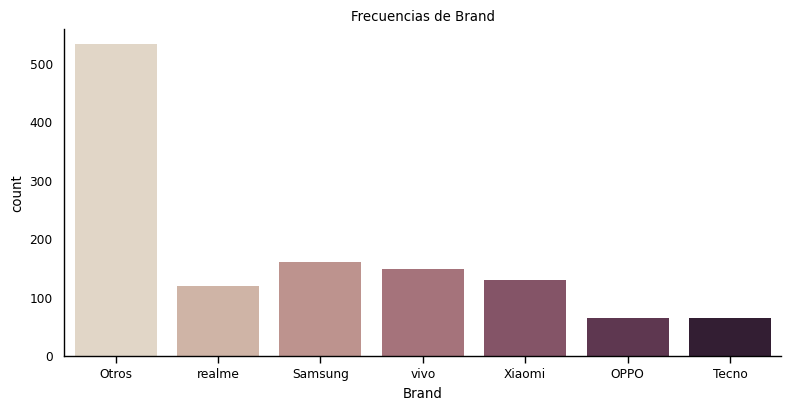

Proporciones de cada categoría antes de agrupar 'Otros' en Name:
 Name
Samsung Galaxy M21 2021 128GB    0.002461
AGM H5 Pro                       0.002461
Samsung Galaxy F12 128GB         0.002461
I Kall K525                      0.002461
I Kall K570                      0.002461
                                   ...   
OnePlus 10 Pro 256GB             0.000820
OPPO A55 4G                      0.000820
Samsung Galaxy A72               0.000820
vivo T2 8GB RAM                  0.000820
Zopo Speed 7                     0.000820
Name: count, Length: 1150, dtype: float64


<Figure size 400x100 with 0 Axes>

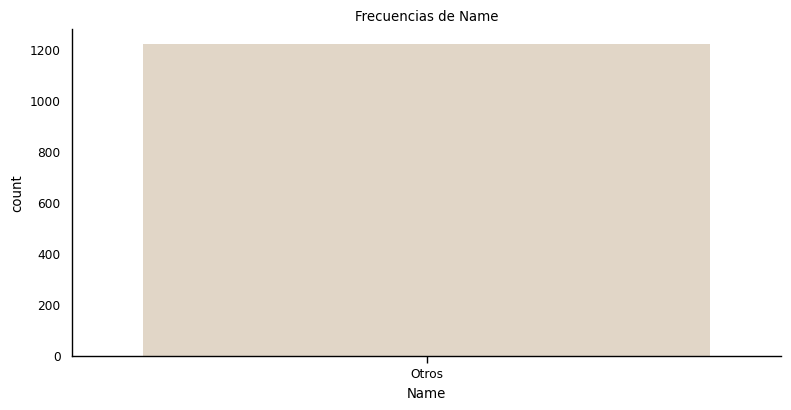

Proporciones de cada categoría antes de agrupar 'Otros' en Processor:
 Processor
MediaTek Helio G35                 0.031993
MediaTek Helio P35                 0.031993
Qualcomm Snapdragon 695            0.030353
Qualcomm Snapdragon 680            0.029532
MediaTek Helio G85                 0.027892
                                     ...   
MediaTek MT6755                    0.000820
MediaTek MT6752                    0.000820
Qualcomm Snapdragon 400 MSM8928    0.000820
MediaTek Dimensity 9000 Plus       0.000820
Qualcomm Snapdragon 480 Plus       0.000820
Name: count, Length: 171, dtype: float64


<Figure size 400x100 with 0 Axes>

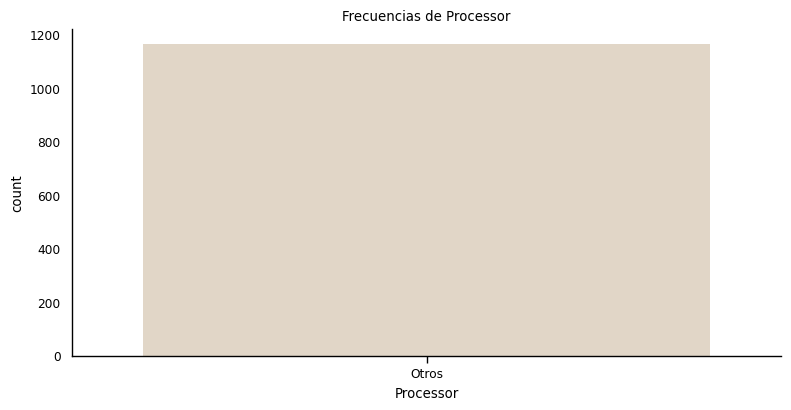

Proporciones de cada categoría antes de agrupar 'Otros' en Launch Date:
 Launch Date
September 9, 2022 (Official)     0.013126
September 17, 2021 (Official)    0.008203
October 2, 2021 (Official)       0.008203
July 26, 2021 (Official)         0.007383
September 22, 2022 (Official)    0.007383
                                   ...   
October 19, 2018 (Official)      0.000820
April 29, 2019 (Official)        0.000820
October 5, 2020 (Official)       0.000820
June 18, 2019 (Official)         0.000820
September 10, 2015 (Official)    0.000820
Name: count, Length: 640, dtype: float64


<Figure size 400x100 with 0 Axes>

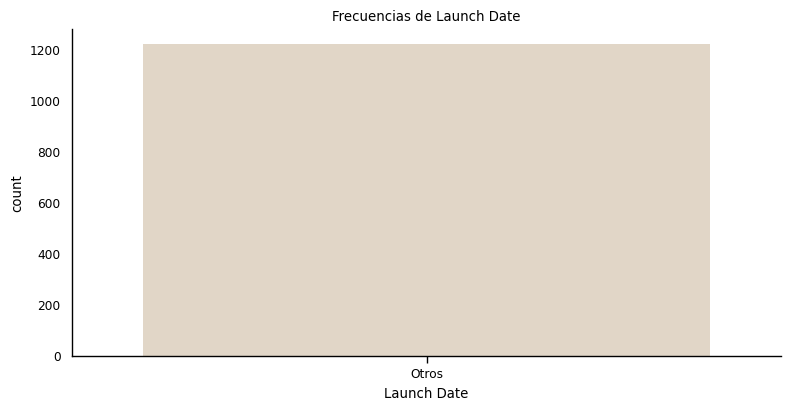

Proporciones de cada categoría antes de agrupar 'Otros' en Operating System:
 Operating System
Android v11                            0.261690
Android v12                            0.227235
Android v10 (Q)                        0.154225
Android v13                            0.077112
Android v9.0 (Pie)                     0.068089
Android v8.1 (Oreo)                    0.042658
Android v6.0 (Marshmallow)             0.029532
Android v7.0 (Nougat)                  0.027071
Android v5.1 (Lollipop)                0.020509
iOS v16                                0.011485
iOS v15                                0.010664
Android v8.0 (Oreo)                    0.007383
Android v7.1.1 (Nougat)                0.006563
iOS v14                                0.005742
Android v4.4 (Kitkat)                  0.004922
iOS v11                                0.003281
Android v4.4.2 (Kitkat)                0.003281
iOS v13.0                              0.003281
Android v7.1 (Nougat)                  0.

<Figure size 400x100 with 0 Axes>

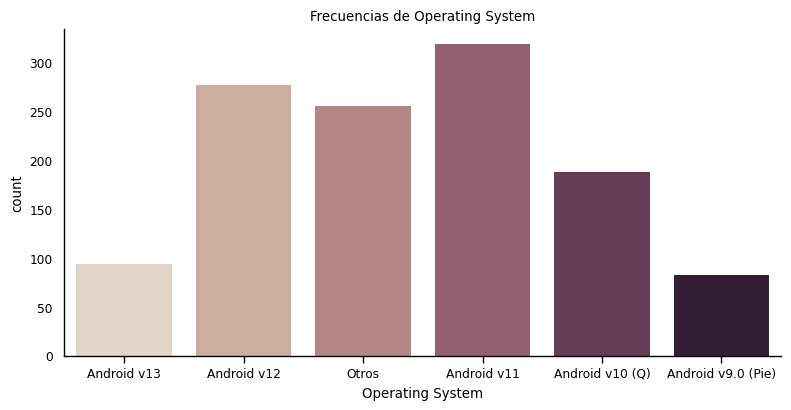

Proporciones de cada categoría antes de agrupar 'Otros' en Graphics:
 Graphics
PowerVR GE8320    0.118130
Mali-G57 MC2      0.070550
Mali-G52 MC2      0.063987
Adreno 610        0.055783
Adreno 619        0.040197
                    ...   
Adreno 225        0.000820
Mali-T830         0.000820
Mali-G52 MP2      0.000820
Adreno 619L       0.000820
Mali-T820 MP1     0.000820
Name: count, Length: 88, dtype: float64


<Figure size 400x100 with 0 Axes>

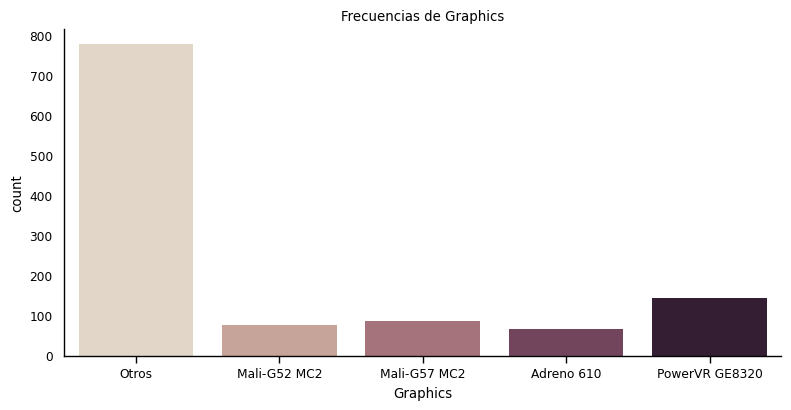

Proporciones de cada categoría antes de agrupar 'Otros' en Display Type:
 Display Type
IPS LCD               0.565217
AMOLED                0.147662
Super AMOLED          0.084495
OLED                  0.044299
PLS TFT LCD           0.029532
Dynamic AMOLED        0.029532
TFT                   0.022970
PLS LCD               0.022149
Fluid AMOLED          0.017227
P-OLED                0.010664
Super AMOLED Plus     0.007383
LCD                   0.004922
S-LCD                 0.004102
Super Fluid AMOLED    0.003281
Optic AMOLED          0.002461
LTPS LCD              0.000820
LTPO AMOLED           0.000820
S-LCD 3               0.000820
S-LCD 2               0.000820
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

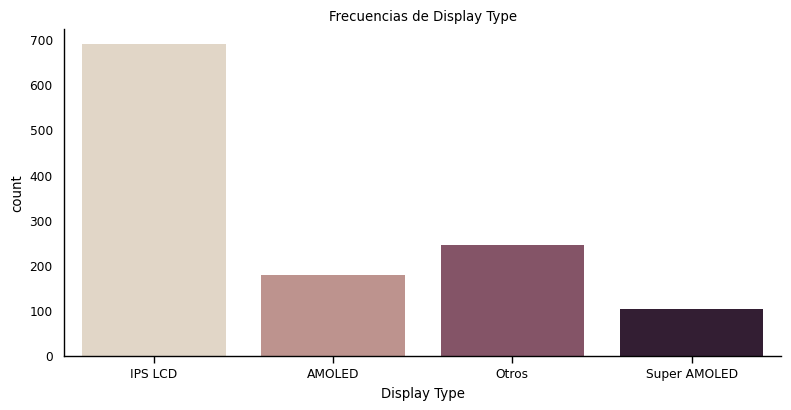

Proporciones de cada categoría antes de agrupar 'Otros' en Fingerprint Sensor:
 Fingerprint Sensor
Yes    0.827728
No     0.150123
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

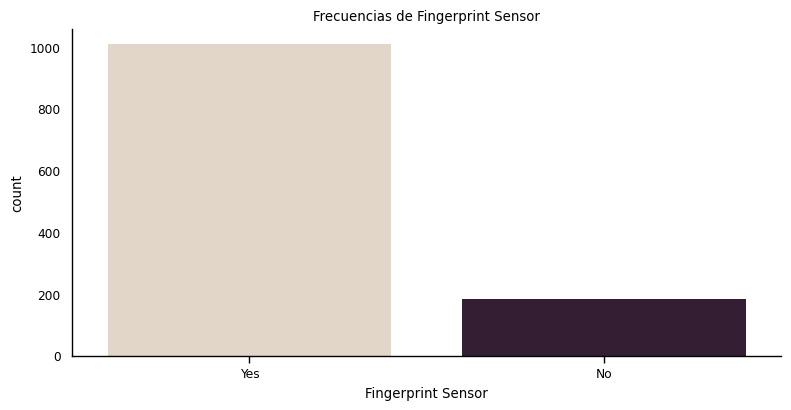

In [186]:
info_frecuencia(mobile_c)

### Numéricas

#### Procesar los datos de las variables numericas para poder realizar las pruebas

In [187]:
# Como las numéricas son cadenas de texto, cambiarlas a numéricas
mobile1_n = mobile_n.copy()
# Convertir a strings
mobile1_n =mobile1_n.applymap(lambda x: str(x))

# Función para extraer números
def extract_numeric_value(text):
    numeric_part = re.findall(r'[\d.,]+', text)  # Encuentra todos los números en el texto
    if numeric_part:
        return float(numeric_part[0].replace(',', ''))  # Devuelve el primer número encontrado como un flotante
    return None

# Función para extraer y convertir el número
def extract_number(text):
    numeric_part = ''.join(filter(str.isdigit, text))  # Extrae solo los dígitos
    return float(numeric_part) if numeric_part else None  # Convierte a flotante

# Aplicar la función para extraer números en la columna 'RAM'
mobile1_n['RAM'] = mobile1_n['RAM'].apply(lambda x: extract_numeric_value(x))
mobile1_n['Battery'] = mobile1_n['Battery'].apply(lambda x: extract_numeric_value(x))
mobile1_n['Display'] = mobile1_n['Display'].apply(lambda x: extract_numeric_value(x))
mobile1_n['Capacity'] = mobile1_n['Capacity'].apply(lambda x: extract_numeric_value(x))
mobile1_n['Internal Memory'] = mobile1_n['Internal Memory'].apply(lambda x: extract_numeric_value(x))
mobile1_n['Price'] = mobile1_n['Price'].apply(lambda x: extract_number(x))

In [188]:
## Quitar los nulos solo para este ejercicio dado que presenta problemas en las pruebas
mobile2_n = mobile1_n.copy()

# mobile2_n.isnull().sum()

mobile2_n.dropna(inplace = True)

#mobile2_n.isnull().sum()

In [189]:
def normalidad(data):
    #Crear una copia:
    data = data.copy()
    for column in data.columns:
        print(f"Análisis de normalidad para la columna '{column}':")
        print("Resumen estadístico:\n", data[column].describe())
        print("Skewness: %f" % data[column].skew())
        print("Kurtosis: %f" % data[column].kurt())

        f, axes = plt.subplots(1, 2, figsize=(10, 3))
        sns.set_context("paper", font_scale=1)

        sns.distplot(data[column], fit=norm, ax=axes[0], kde=True)
        axes[0].set_title("Histograma")

        stats.probplot(x=data[column], plot=plt, fit=True)
        axes[1].set_title("Q-Q plot")

        plt.show()

        print('PRUEBAS DE NORMALIDAD:')
        print('******Kolmogorov-Smirnov*********************************************')
        stat, p = stats.kstest(data[column], 'norm')
        print("\tP_valor KS= {:.7f}\tstat = {:.5f}".format(p, stat))
        if p < 0.05:
            print('Se rechaza la normalidad con KS')

        print('******Shapiro-Wilk*********************************************')
        stat, p = stats.shapiro(data[column])
        print("\tP_valor SW= {:.7f}\tstat = {:.5f}".format(p, stat))
        if p < 0.05:
            print('Se rechaza la normalidad con Shapiro-Wilk')

        print('******D’Agostino y Pearson******************************************')
        stat, p = stats.normaltest(data[column])
        print("\tP_valor DA= {:.7f}\tstat = {:.5f}".format(p, stat))
        if p < 0.05:
            print('Se rechaza la normalidad con D’Agostino y Pearson')

        print('____________________________________________________________________________________')


Análisis de normalidad para la columna 'RAM':
Resumen estadístico:
 count    1215.000000
mean        6.580247
std        19.859970
min         1.000000
25%         4.000000
50%         4.000000
75%         8.000000
max       512.000000
Name: RAM, dtype: float64
Skewness: 19.161268
Kurtosis: 415.450723


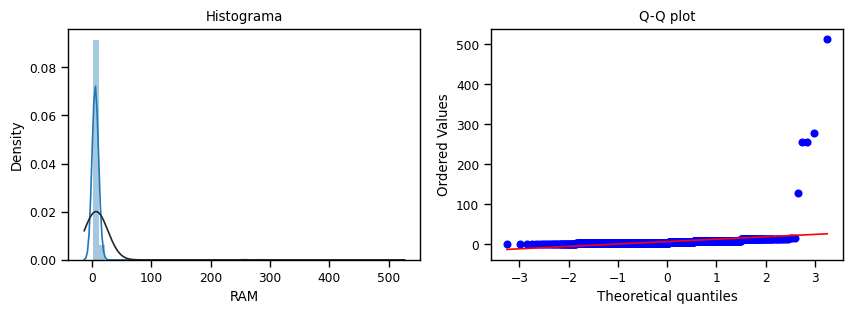

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 0.94515
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.09433
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 2677.81853
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________
Análisis de normalidad para la columna 'Battery':
Resumen estadístico:
 count     1215.000000
mean      4545.506173
std       1121.128980
min        860.000000
25%       4000.000000
50%       5000.000000
75%       5000.000000
max      12000.000000
Name: Battery, dtype: float64
Skewness: 0.444258
Kurtosis: 5.145434


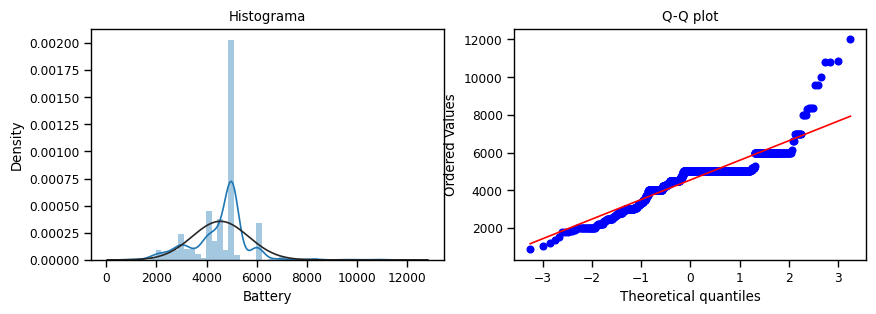

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 1.00000
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.85809
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 180.52754
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________
Análisis de normalidad para la columna 'Display':
Resumen estadístico:
 count    1215.000000
mean        6.324741
std         0.545635
min         2.200000
25%         6.300000
50%         6.500000
75%         6.600000
max         7.850000
Name: Display, dtype: float64
Skewness: -2.339358
Kurtosis: 8.168642


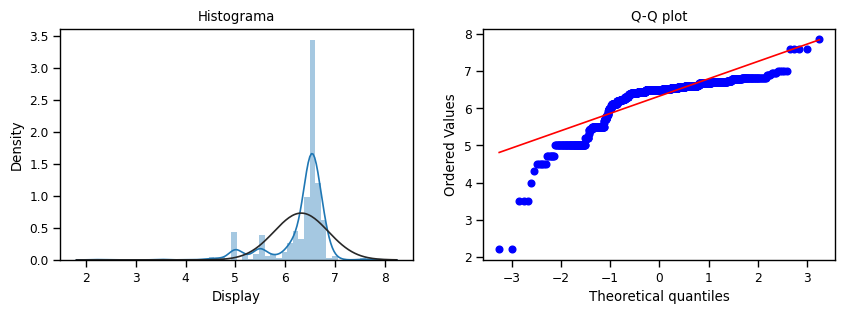

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 0.99812
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.72850
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 631.31735
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________
Análisis de normalidad para la columna 'Capacity':
Resumen estadístico:
 count     1215.000000
mean      4545.506173
std       1121.128980
min        860.000000
25%       4000.000000
50%       5000.000000
75%       5000.000000
max      12000.000000
Name: Capacity, dtype: float64
Skewness: 0.444258
Kurtosis: 5.145434


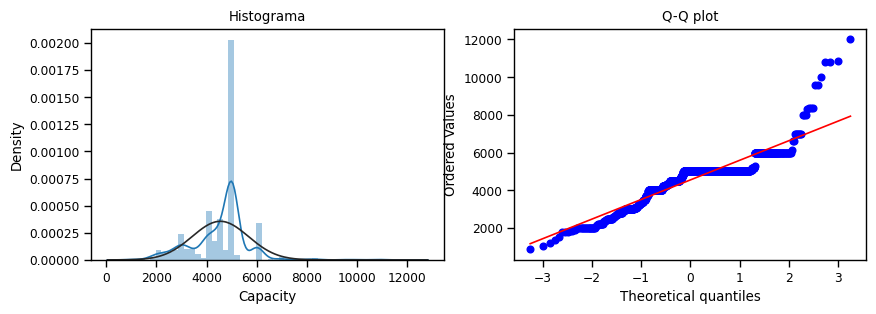

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 1.00000
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.85809
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 180.52754
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________
Análisis de normalidad para la columna 'Internal Memory':
Resumen estadístico:
 count    1215.000000
mean      108.539918
std        84.993651
min         1.000000
25%        64.000000
50%       128.000000
75%       128.000000
max       512.000000
Name: Internal Memory, dtype: float64
Skewness: 1.875422
Kurtosis: 5.506487


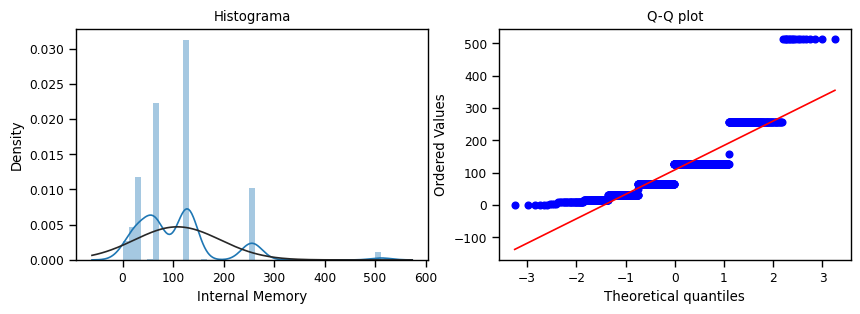

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 0.99421
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.78899
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 489.59757
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________
Análisis de normalidad para la columna 'Price':
Resumen estadístico:
 count    1.215000e+03
mean     2.240231e+06
std      2.304061e+06
min      5.999000e+05
25%      9.500000e+05
50%      1.499000e+06
75%      2.499900e+06
max      1.779990e+07
Name: Price, dtype: float64
Skewness: 3.276192
Kurtosis: 13.354317


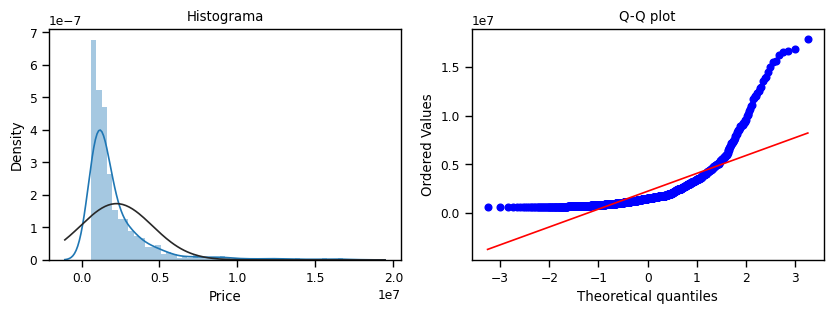

PRUEBAS DE NORMALIDAD:
******Kolmogorov-Smirnov*********************************************
	P_valor KS= 0.0000000	stat = 1.00000
Se rechaza la normalidad con KS
******Shapiro-Wilk*********************************************
	P_valor SW= 0.0000000	stat = 0.63179
Se rechaza la normalidad con Shapiro-Wilk
******D’Agostino y Pearson******************************************
	P_valor DA= 0.0000000	stat = 866.65073
Se rechaza la normalidad con D’Agostino y Pearson
____________________________________________________________________________________


In [190]:
normalidad(mobile2_n)

# Análisis bivariado - Predictoras

## Numéricas - Numéricas

In [191]:
mobile1_n.head()

,RAM,Battery,Display,Capacity,Internal Memory,Price
0,8.0,5000.0,6.72,5000.0,128.0,1999900.0
1,6.0,5000.0,6.70,5000.0,128.0,2481800.0
2,4.0,5000.0,6.74,5000.0,64.0,899900.0
3,8.0,5000.0,6.74,5000.0,128.0,3999900.0
4,8.0,5000.0,6.67,5000.0,256.0,2999900.0


In [192]:
mobile1_n_filtrado = mobile1_n.drop('Price', axis=1)
mobile1_n_filtrado.head() # Necesitamos filtrar ya que es solo predictoras

,RAM,Battery,Display,Capacity,Internal Memory
0,8.0,5000.0,6.72,5000.0,128.0
1,6.0,5000.0,6.70,5000.0,128.0
2,4.0,5000.0,6.74,5000.0,64.0
3,8.0,5000.0,6.74,5000.0,128.0
4,8.0,5000.0,6.67,5000.0,256.0


### Prueba de Spearman

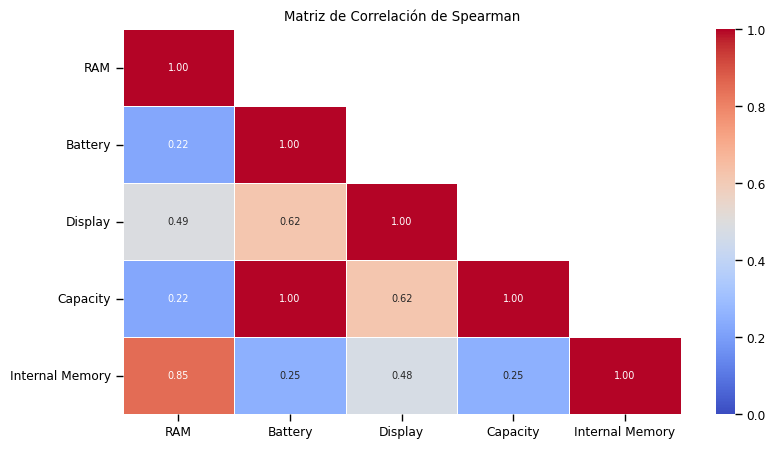

In [193]:
spearman_correlation = mobile1_n_filtrado.corr(method='spearman')

# Crear una máscara para ocultar la parte superior derecha de la matriz de correlación
mask = np.triu(np.ones_like(spearman_correlation, dtype=bool), k=1)

# Crear un mapa de calor con Seaborn usando la máscara
plt.figure(figsize=(9,5))

sns.heatmap(spearman_correlation, mask = mask, vmin=0, vmax=1, square=False, annot=True, fmt=".2f", annot_kws={"size": 7}, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación de Spearman")
plt.show()

## Numéricas - Categóricas

In [194]:
# Valores nulos categóricas
mobile_c.isnull().sum()

Brand                  0
Name                   0
Processor             55
Launch Date            0
Operating System       2
Graphics              65
Display Type           1
Fingerprint Sensor    27
dtype: int64

Debido al contexto del problema y la base de datos filtrada para contener solo variables categóricas se encuentran valores nulos artificiales, es por esto que para esta sección se filtrara la base solo con las filas que no tengan valores nulos.

In [195]:
mobile_c_sinnulos = mobile_c.copy().dropna()
mobile_c_sinnulos.isnull().sum()

Brand                 0
Name                  0
Processor             0
Launch Date           0
Operating System      0
Graphics              0
Display Type          0
Fingerprint Sensor    0
dtype: int64

In [196]:
# Valores nulos numéricas
mobile1_n.isnull().sum()

RAM                3
Battery            1
Display            0
Capacity           1
Internal Memory    3
Price              0
dtype: int64

Se encuentra lo mismo que en las categoricas y replicamos el proceso

In [197]:
mobile1_n_sinnulos = mobile1_n.copy().dropna()
mobile1_n_sinnulos.isnull().sum()

RAM                0
Battery            0
Display            0
Capacity           0
Internal Memory    0
Price              0
dtype: int64

In [198]:
mobile1_n_sinnulos.shape

(1215, 6)

In [199]:
mobile_c_sinnulos.shape

(1138, 8)

### Prueba Kruskall Wallis

In [200]:
mobile_c_sinnulos.columns.to_list()

['Brand',
 'Name',
 'Processor',
 'Launch Date',
 'Operating System',
 'Graphics',
 'Display Type',
 'Fingerprint Sensor']

In [201]:
mobile1 = mobile_c_sinnulos.merge(mobile1_n_sinnulos, how="inner", left_index=True, right_index=True)
mobile1.head()

,Brand,Name,Processor,Launch Date,Operating System,Graphics,Display Type,Fingerprint Sensor,RAM,Battery,Display,Capacity,Internal Memory,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,Qualcomm Snapdragon 695,"April 11, 2023 (Official)",Android v13,Adreno 619,IPS LCD,Yes,8.0,5000.0,6.72,5000.0,128.0,1999900.0
1,realme,realme 10 Pro Plus 5G,MediaTek Dimensity 1080 MT6877V,"December 8, 2022 (Official)",Android v13,Mali-G68 MC4,AMOLED,Yes,6.0,5000.0,6.70,5000.0,128.0,2481800.0
2,realme,realme Narzo N53,Unisoc T612,"May 22, 2023 (Official)",Android v13,Mali-G57,IPS LCD,Yes,4.0,5000.0,6.74,5000.0,64.0,899900.0
3,OnePlus,OnePlus 11R,Qualcomm Snapdragon 8 Plus Gen 1,"February 21, 2023 (Official)",Android v13,Adreno 730,Super Fluid AMOLED,Yes,8.0,5000.0,6.74,5000.0,128.0,3999900.0
4,POCO,POCO F5,Qualcomm Snapdragon 7 Plus Gen 2,"May 10, 2023 (Official)",Android v13,Adreno 725,AMOLED,Yes,8.0,5000.0,6.67,5000.0,256.0,2999900.0


In [202]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, kruskal

variables_nu = mobile1_n_sinnulos.columns.to_list()
variables_ca = mobile_c_sinnulos.columns.to_list()

results_list = []

for var_num in variables_nu:
    for var_cat in variables_ca:
        if type(mobile1[var_cat][0]) == np.int64: 
            stat, p_value = mannwhitneyu(mobile1[var_num], mobile1[var_cat])
            test_type = "Mann-Whitney U"
        else:
            if pd.api.types.is_numeric_dtype(mobile1[var_num]):
                grouped_data = [mobile1[var_num][mobile1[var_cat] == category] for category in mobile1[var_cat].unique()]
                stat, p_value = kruskal(*grouped_data)
                test_type = "Kruskal-Wallis"
            else:
                test_type = "No se puede realizar la prueba"
                p_value = None

        result_dict = {
            "Variable Numérica": var_num,
            "Variable Categórica": var_cat,
            "Tipo de Prueba": test_type,
            "Valor p": p_value
        }
        
        results_list.append(result_dict)

results = pd.DataFrame(results_list)

In [203]:
def resultados_nu_ca(p_value, test_type):
    alpha = 0.05
    if p_value < alpha:
        if test_type == "Mann-Whitney U":
            return "Dependencia (Mann-Whitney U)"
        elif test_type == "Kruskal-Wallis":
            return "Dependencia (Kruskal-Wallis)"
    else:
        return "Independencia"
    
results["Resultados"] = results.apply(lambda row: resultados_nu_ca(row["Valor p"], row["Tipo de Prueba"]), axis=1)

In [204]:
results.head()

,Variable Numérica,Variable Categórica,Tipo de Prueba,Valor p,Resultados
0,RAM,Brand,Kruskal-Wallis,4.121148e-48,Dependencia (Kruskal-Wallis)
1,RAM,Name,Kruskal-Wallis,1.281873e-01,Independencia
2,RAM,Processor,Kruskal-Wallis,3.847221e-103,Dependencia (Kruskal-Wallis)
3,RAM,Launch Date,Kruskal-Wallis,6.289764e-13,Dependencia (Kruskal-Wallis)
4,RAM,Operating System,Kruskal-Wallis,2.602208e-53,Dependencia (Kruskal-Wallis)


In [205]:
results[results["Valor p"] >= 0.9]['Variable Categórica'].unique()

array([], dtype=object)

In [206]:
pivoted_results = results.pivot(index="Variable Numérica", columns="Variable Categórica", values="Valor p")
pivoted_results.style.background_gradient()

Variable Categórica,Brand,Display Type,Fingerprint Sensor,Graphics,Launch Date,Name,Operating System,Processor
Variable Numérica,,,,,,,,
Battery,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000
Capacity,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000
Display,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000
Internal Memory,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000
Price,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000
RAM,0.000000,0.000000,0.000000,0.000000,0.000000,0.128187,0.000000,0.000000


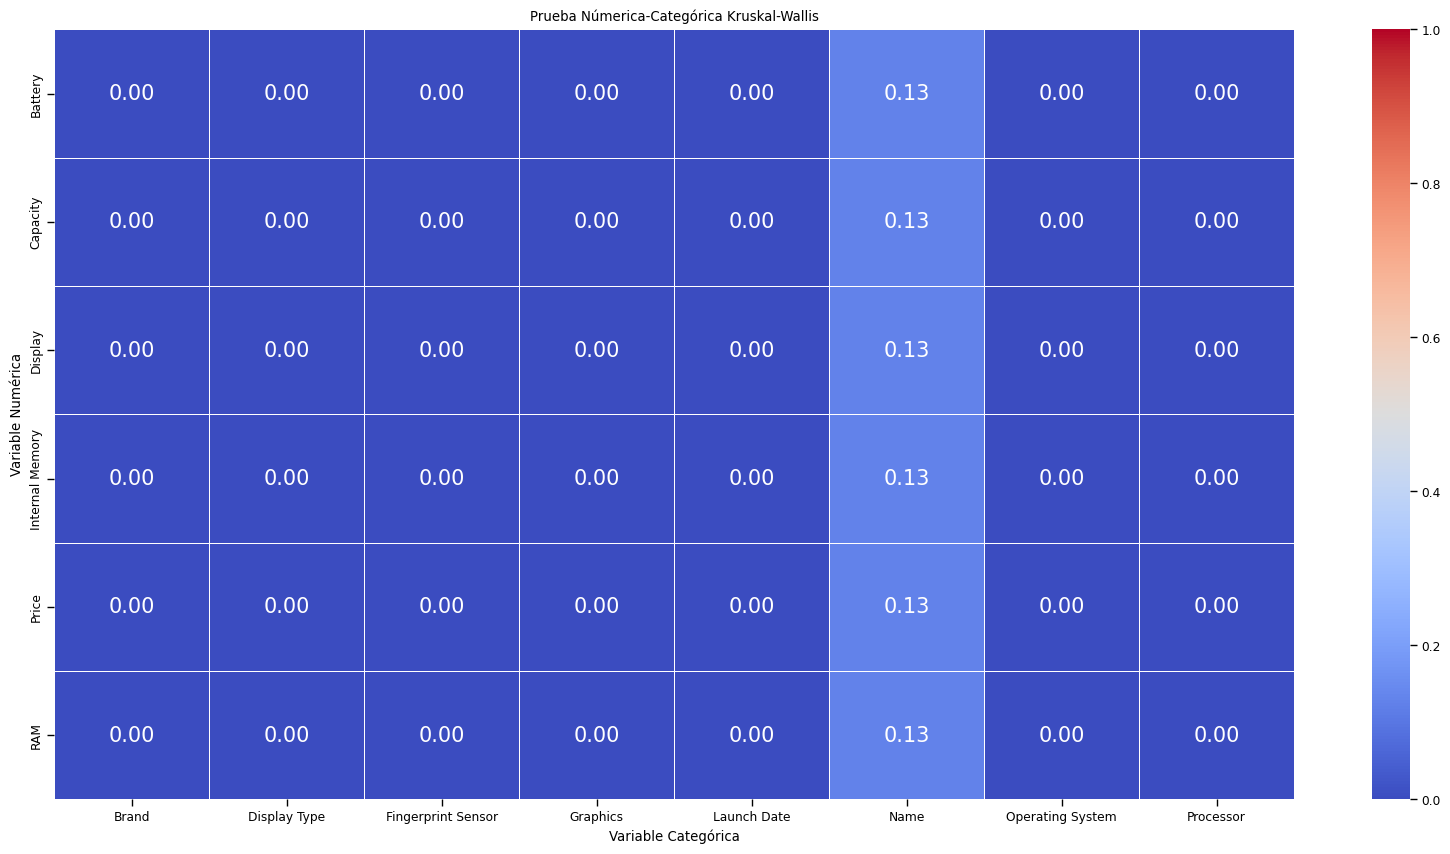

In [207]:
plt.figure(figsize=(20, 10))
plt.title("Prueba Númerica-Categórica Kruskal-Wallis")
sns.heatmap(pivoted_results, vmin=0, vmax=1, square=False, annot=True, fmt=".2f", annot_kws={"size": 15}, cmap="coolwarm", linewidths=0.5)
plt.show()

el valor p es 0.13 de todas las numericas frente a Name indica que se mantiene la hipótesis nula por ser mayor al nivel de significancia 0.05, y se supone que no hay diferencias entre los distintos grupos de cada categoria en cuanto al nombre del dispositivo.

## Categórica - Categórica

### Prueba Chi-cuadrado

In [208]:
from itertools import combinations
from scipy.stats import chi2_contingency

def prueba_chi_cuadrado_todas(dataframe):
    columns = dataframe.columns
    num_variables = len(columns)
    results = []

    for variable1, variable2 in combinations(columns, 2):
        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(dataframe[variable1], dataframe[variable2])

        # Realizar la prueba de chi-cuadrado
        chi2, p, _, _ = chi2_contingency(tabla_contingencia)

        # Almacenar los resultados en una lista
        results.append([variable1, variable2, p, p < 0.05])

    # Crear un DataFrame a partir de la lista de resultados
    result_df = pd.DataFrame(results, columns=['Variable1', 'Variable2', 'P-Valor', 'Rechazo_Hipotesis'])

    return result_df

In [209]:
prueba_chi_cuadrado_todas(mobile_c).sort_values(by = 'P-Valor',ascending = False).style.background_gradient()

,Variable1,Variable2,P-Valor,Rechazo_Hipotesis
12,Name,Fingerprint Sensor,0.084027,False
11,Name,Display Type,0.000000,True
21,Launch Date,Fingerprint Sensor,0.000000,True
9,Name,Operating System,0.000000,True
0,Brand,Name,0.000000,True
10,Name,Graphics,0.000000,True
27,Display Type,Fingerprint Sensor,0.000000,True
6,Brand,Fingerprint Sensor,0.000000,True
7,Name,Processor,0.000000,True
17,Processor,Fingerprint Sensor,0.000000,True


# Análisis bivariado - Predictoras vs Objetivo

## Numéricas vs Objetivo

In [210]:
def matriz_spearman_obj(dataframe, variables):
    num_variables = len(variables)
    table = pd.DataFrame(index=variables, columns=['Price'])

    for i in range(num_variables):
        variable1 = 'Price'
        variable2 = variables[i]

        # Calcular la correlación de Spearman y el p-valor
        correlation, p_value = spearmanr(dataframe[variable1], dataframe[variable2])

        # Almacenar el valor de correlación en el DataFrame para la variable actual
        table.loc[variable2, 'Price'] = p_value

    return table

In [211]:
matriz_spearman_obj(mobile1, variables_nu).sort_values(by = 'Price',ascending = False).style.background_gradient()

,Price
Battery,0.001895
Capacity,0.001895
Display,0.000000
Internal Memory,0.000000
RAM,0.000000
Price,0.000000


## Categóricas vs Objetivo

In [212]:
results

,Variable Numérica,Variable Categórica,Tipo de Prueba,Valor p,Resultados
0,RAM,Brand,Kruskal-Wallis,4.121148e-48,Dependencia (Kruskal-Wallis)
1,RAM,Name,Kruskal-Wallis,1.281873e-01,Independencia
2,RAM,Processor,Kruskal-Wallis,3.847221e-103,Dependencia (Kruskal-Wallis)
3,RAM,Launch Date,Kruskal-Wallis,6.289764e-13,Dependencia (Kruskal-Wallis)
4,RAM,Operating System,Kruskal-Wallis,2.602208e-53,Dependencia (Kruskal-Wallis)
5,RAM,Graphics,Kruskal-Wallis,5.153824e-130,Dependencia (Kruskal-Wallis)
6,RAM,Display Type,Kruskal-Wallis,8.885660e-93,Dependencia (Kruskal-Wallis)
7,RAM,Fingerprint Sensor,Kruskal-Wallis,5.993736e-48,Dependencia (Kruskal-Wallis)
8,Battery,Brand,Kruskal-Wallis,1.704946e-68,Dependencia (Kruskal-Wallis)
9,Battery,Name,Kruskal-Wallis,1.281873e-01,Independencia


In [213]:
resultados_dependientes_u = results[results["Variable Numérica"].str.contains("Price")]
resultados_dependientes_u

,Variable Numérica,Variable Categórica,Tipo de Prueba,Valor p,Resultados
40,Price,Brand,Kruskal-Wallis,5.102762e-78,Dependencia (Kruskal-Wallis)
41,Price,Name,Kruskal-Wallis,1.281873e-01,Independencia
42,Price,Processor,Kruskal-Wallis,1.956477e-111,Dependencia (Kruskal-Wallis)
43,Price,Launch Date,Kruskal-Wallis,1.490682e-14,Dependencia (Kruskal-Wallis)
44,Price,Operating System,Kruskal-Wallis,5.478674e-38,Dependencia (Kruskal-Wallis)
45,Price,Graphics,Kruskal-Wallis,1.097529e-139,Dependencia (Kruskal-Wallis)
46,Price,Display Type,Kruskal-Wallis,1.005333e-108,Dependencia (Kruskal-Wallis)
47,Price,Fingerprint Sensor,Kruskal-Wallis,1.510748e-15,Dependencia (Kruskal-Wallis)


In [214]:
results_k = results[results["Variable Numérica"].str.contains("Price")]
pivoted_results_k = results_k.pivot(index="Variable Numérica", columns="Variable Categórica", values="Valor p")
pivoted_results_k.transpose().sort_values(by = 'Price',ascending = False).style.background_gradient()

Variable Numérica,Price
Variable Categórica,
Name,0.128187
Launch Date,0.000000
Fingerprint Sensor,0.000000
Operating System,0.000000
Brand,0.000000
Display Type,0.000000
Processor,0.000000
Graphics,0.000000


# Detección de Atípicos

### Registro Valores Atípicos

### *Numéricas*

In [215]:
mobile1_n

,RAM,Battery,Display,Capacity,Internal Memory,Price
0,8.0,5000.0,6.72,5000.0,128.0,1999900.0
1,6.0,5000.0,6.70,5000.0,128.0,2481800.0
2,4.0,5000.0,6.74,5000.0,64.0,899900.0
3,8.0,5000.0,6.74,5000.0,128.0,3999900.0
4,8.0,5000.0,6.67,5000.0,256.0,2999900.0
...,...,...,...,...,...,...
1216,3.0,3000.0,5.50,3000.0,16.0,630000.0
1217,2.0,4000.0,5.00,4000.0,8.0,870000.0
1218,1.0,2910.0,5.50,2910.0,8.0,883000.0
1219,2.0,2500.0,5.00,2500.0,16.0,1050000.0


In [216]:
Q1 = mobile1_n.quantile(0.25)
Q3 = mobile1_n.quantile(0.75)
IQR = Q3 - Q1


umbral = 1.5
umbral_inferior = Q1 - umbral * IQR
umbral_superior = Q3 + umbral * IQR

datos_atipicos = ((mobile1_n < umbral_inferior) | (mobile1_n > umbral_superior)).any(axis=1)

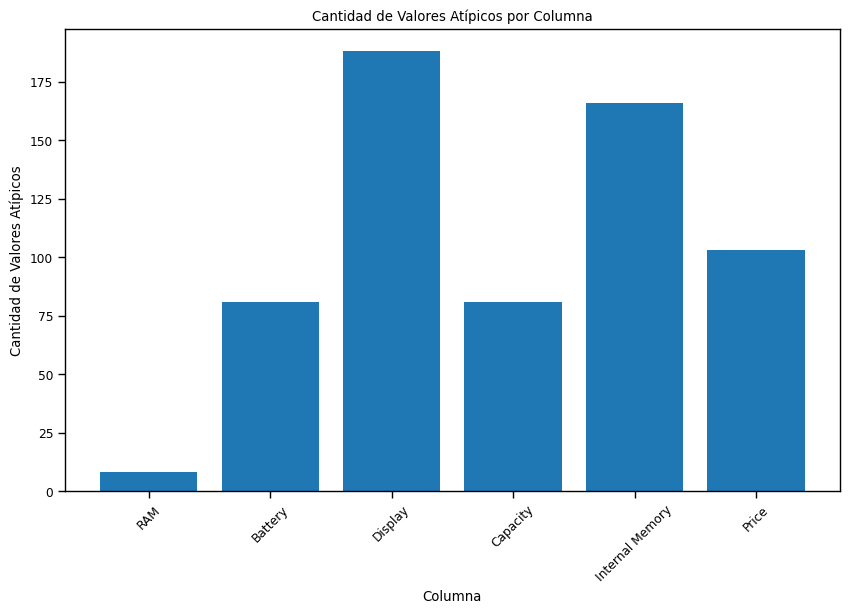

           Columna  Cantidad de Valores Atípicos
0              RAM                             8
1          Battery                            81
2          Display                           188
3         Capacity                            81
4  Internal Memory                           166
5            Price                           103


In [217]:
atipicos_por_columna = {}

for columna in mobile1_n.columns:
    Q1 = mobile1_n[columna].quantile(0.25)
    Q3 = mobile1_n[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral = 1.5
    umbral_inferior = Q1 - umbral * IQR
    umbral_superior = Q3 + umbral * IQR
    
    atipicos_por_columna[columna] = ((mobile1_n[columna] < umbral_inferior) | (mobile1_n[columna] > umbral_superior)).sum()

df_atipicos_por_columna = pd.DataFrame(list(atipicos_por_columna.items()), columns=['Columna', 'Cantidad de Valores Atípicos'])

plt.figure(figsize=(10, 6))
plt.bar(df_atipicos_por_columna['Columna'], df_atipicos_por_columna['Cantidad de Valores Atípicos'])
plt.title('Cantidad de Valores Atípicos por Columna')
plt.xlabel('Columna')
plt.ylabel('Cantidad de Valores Atípicos')
plt.xticks(rotation=45)
plt.show()

print(df_atipicos_por_columna)

In [218]:
import plotly.express as px

df_atipicos_plotly = pd.DataFrame(list(atipicos_por_columna.items()), columns=['Columna', 'Cantidad de Valores Atípicos'])

fig = px.bar(df_atipicos_plotly, x='Columna', y='Cantidad de Valores Atípicos',
             title='Cantidad de Valores Atípicos',
             labels={'Cantidad de Valores Atípicos': 'Cantidad de Atípicos', 'Columna': 'Columna'},
             width=800, height=500)

fig.update_layout(
    xaxis=dict(title=dict(text='Variables Numéricas'), showgrid=False, showticklabels=True),
    yaxis=dict(title=None, showgrid=False, showticklabels=False),
    showlegend=False,
    barmode='group',
    plot_bgcolor='white',  
)


for i, row in df_atipicos_plotly.iterrows():
    fig.add_annotation(
        x=row['Columna'],
        y=row['Cantidad de Valores Atípicos'],
        text=row['Cantidad de Valores Atípicos'],
        showarrow=False,
        font=dict(size=12),
        xanchor='center',  
        yanchor='bottom',  
        yshift=5,  
    )

fig.show()

In [232]:
import plotly.express as px

df_atipicos_plotly = pd.DataFrame(list(atipicos_por_columna.items()), columns=['Columna', 'Cantidad de Valores Atípicos'])

fig = px.bar(df_atipicos_plotly, x='Columna', y='Cantidad de Valores Atípicos',
             title='Cantidad de Valores Atípicos',
             labels={'Cantidad de Valores Atípicos': 'Cantidad de Atípicos', 'Columna': 'Columna'},
             width=800, height=500)

fig.update_layout(
    xaxis=dict(title=dict(text='Variables Numéricas'), showgrid=False, showticklabels=True),
    yaxis=dict(title=None, showgrid=False, showticklabels=False),
    showlegend=False,
    barmode='group',
    plot_bgcolor='white',  
)

fig.update_traces(marker_color='lightgrey')

for i, row in df_atipicos_plotly.iterrows():
    fig.add_annotation(
        x=row['Columna'],
        y=row['Cantidad de Valores Atípicos'],
        text=row['Cantidad de Valores Atípicos'],
        showarrow=False,
        font=dict(size=12),
        xanchor='center',  
        yanchor='bottom',  
        yshift=5,  
    )
    
fig.show()

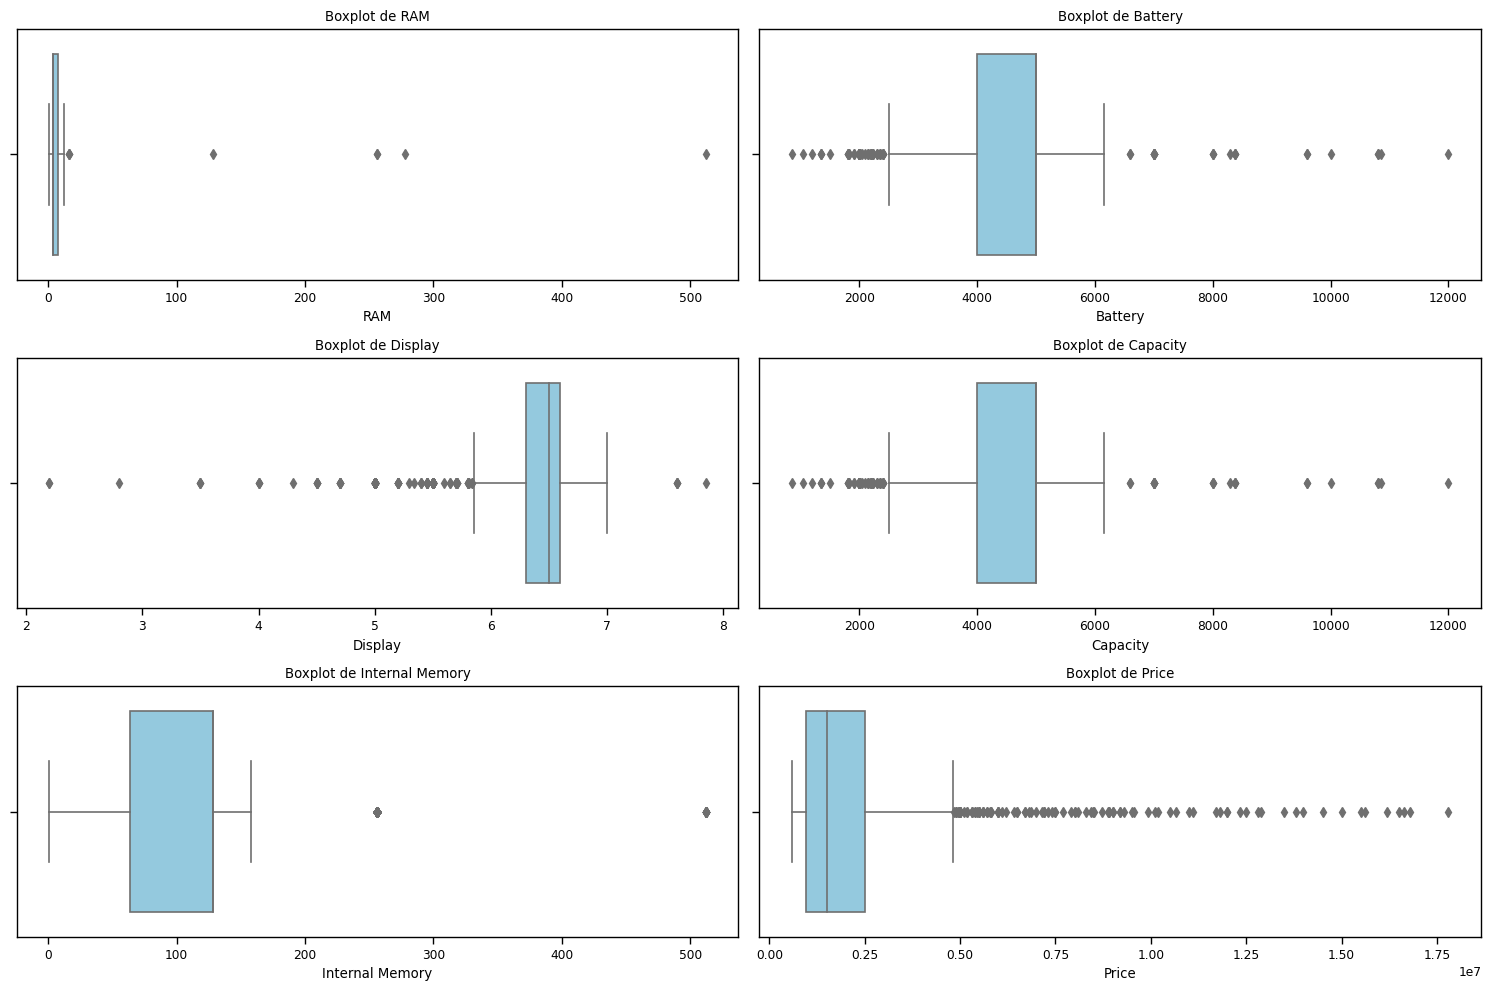

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

for i, columna in enumerate(mobile1_n.columns):
    plt.subplot(3, 2, i + 1)  
    sns.boxplot(x=mobile1_n[columna], color='skyblue')
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()

plt.show()

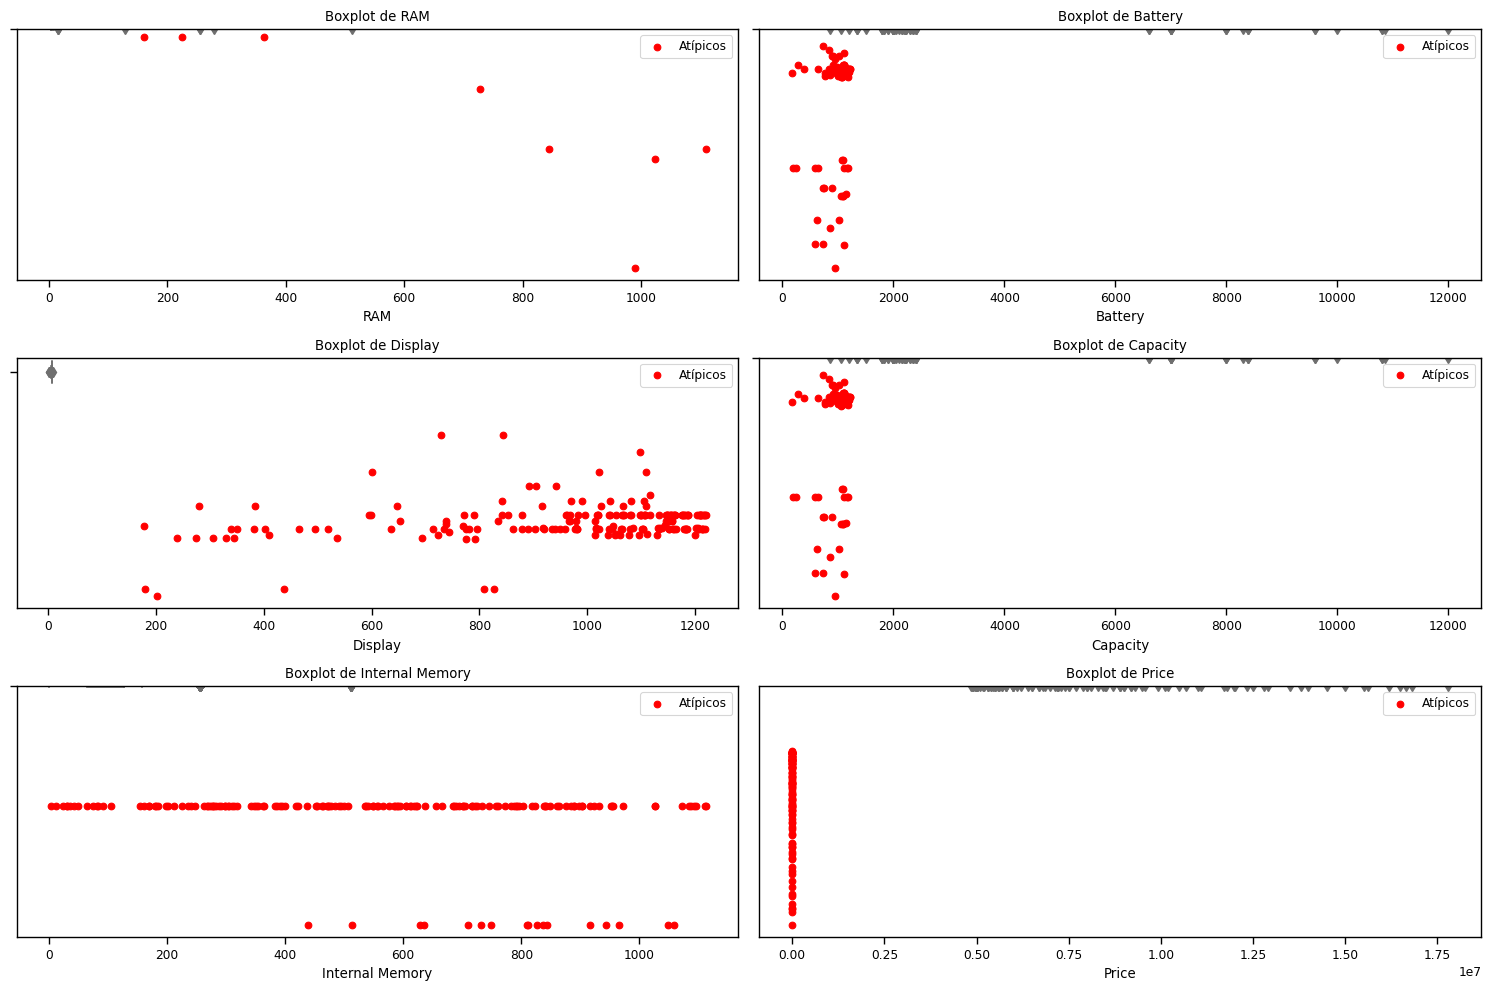

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama mobile1_n

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna por separado
for i, columna in enumerate(mobile1_n.columns):
    plt.subplot(3, 2, i + 1)  # 3 filas, 2 columnas (ajustar según sea necesario)
    
    # Crear el boxplot
    sns.boxplot(x=mobile1_n[columna], color='skyblue')
    
    # Identificar valores atípicos y marcarlos en rojo
    q1 = mobile1_n[columna].quantile(0.25)
    q3 = mobile1_n[columna].quantile(0.75)
    iqr = q3 - q1
    umbral_inferior = q1 - 1.5 * iqr
    umbral_superior = q3 + 1.5 * iqr
    
    valores_atipicos = mobile1_n[(mobile1_n[columna] < umbral_inferior) | (mobile1_n[columna] > umbral_superior)][columna]
    
    plt.scatter(valores_atipicos.index, valores_atipicos, color='red', label='Atípicos')
    
    plt.title(f'Boxplot de {columna}')
    plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

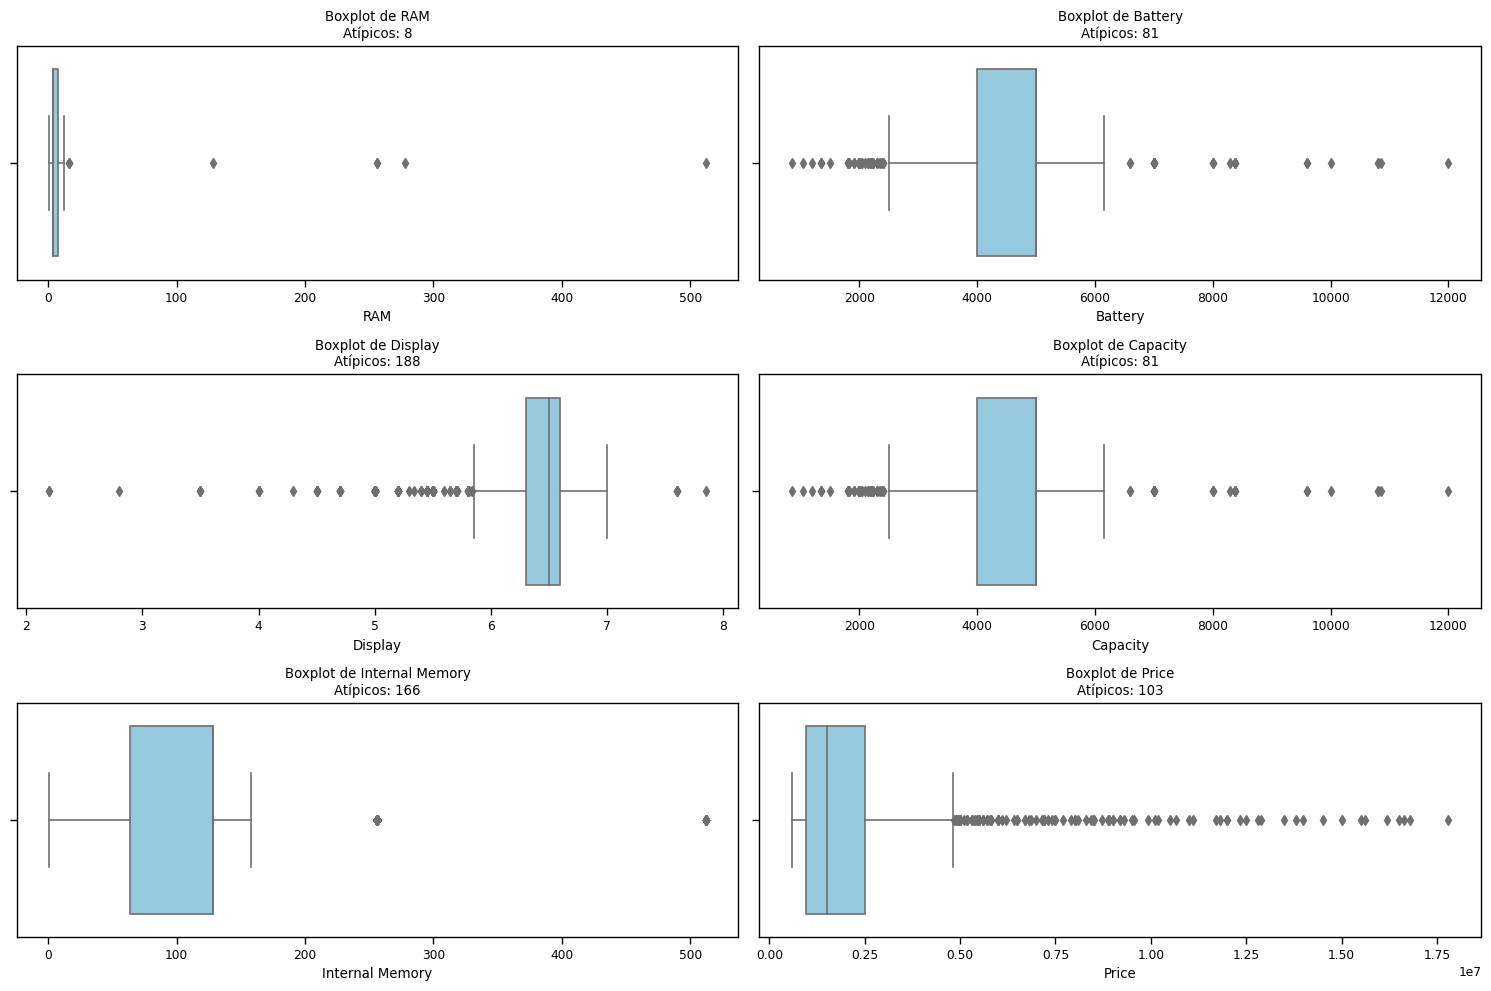

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama mobile1_n

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna por separado
for i, columna in enumerate(mobile1_n.columns):
    plt.subplot(3, 2, i + 1)  # 3 filas, 2 columnas (ajustar según sea necesario)
    
    # Crear el boxplot
    sns.boxplot(x=mobile1_n[columna], color='skyblue')
    
    # Identificar valores atípicos y contarlos
    q1 = mobile1_n[columna].quantile(0.25)
    q3 = mobile1_n[columna].quantile(0.75)
    iqr = q3 - q1
    umbral_inferior = q1 - 1.5 * iqr
    umbral_superior = q3 + 1.5 * iqr
    
    valores_atipicos = mobile1_n[(mobile1_n[columna] < umbral_inferior) | (mobile1_n[columna] > umbral_superior)][columna]
    
    cantidad_atipicos = len(valores_atipicos)
    
    plt.title(f'Boxplot de {columna}\nAtípicos: {cantidad_atipicos}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### *Categóricas*

In [223]:
mobile_c

,Brand,Name,Processor,Launch Date,Operating System,Graphics,Display Type,Fingerprint Sensor
0,OnePlus,OnePlus Nord CE 3 Lite 5G,Qualcomm Snapdragon 695,"April 11, 2023 (Official)",Android v13,Adreno 619,IPS LCD,Yes
1,realme,realme 10 Pro Plus 5G,MediaTek Dimensity 1080 MT6877V,"December 8, 2022 (Official)",Android v13,Mali-G68 MC4,AMOLED,Yes
2,realme,realme Narzo N53,Unisoc T612,"May 22, 2023 (Official)",Android v13,Mali-G57,IPS LCD,Yes
3,OnePlus,OnePlus 11R,Qualcomm Snapdragon 8 Plus Gen 1,"February 21, 2023 (Official)",Android v13,Adreno 730,Super Fluid AMOLED,Yes
4,POCO,POCO F5,Qualcomm Snapdragon 7 Plus Gen 2,"May 10, 2023 (Official)",Android v13,Adreno 725,AMOLED,Yes
...,...,...,...,...,...,...,...,...
1216,Zopo,Zopo Speed 7 Plus,MediaTek MT6753,"October 22, 2015 (Official)",Android v5.1 (Lollipop),Mali-T720 MP3,IPS LCD,No
1217,Lava,Lava Iris Fuel F1,MediaTek MT6580,"October 14, 2015 (Official)",Android v5.1 (Lollipop),Mali-400 MP,IPS LCD,No
1218,Panasonic,Panasonic P65 Flash,MediaTek,"October 12, 2015 (Official)",Android v5.1 (Lollipop),NaN,IPS LCD,NaN
1219,Lava,Lava Iris X8,MediaTek MT6592M,"February 12, 2015 (Official)",Android v4.4.2 (Kitkat),Mali-450 MP4,IPS LCD,No


In [224]:
def info_frecuencia(df, threshold=0.05):
    for columna in df.columns:
        if df[columna].dtype == 'object':
            df_copy = df.copy()

            # Calcular las proporciones de cada categoría
            value_counts = df_copy[columna].value_counts() / len(df_copy)

            # Imprimir las frecuencias antes de la agrupacion
            print(f"Proporciones de cada categoría antes de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            # Encontrar las categorías que representan menos del threshold
            categorias_a_agrupar = value_counts[value_counts < threshold].index

            # Reemplazar las categorías con "Otros" en la copia
            df_copy[columna] = df_copy[columna].apply(lambda x: "Otros" if x in categorias_a_agrupar else x)

            # Mostrar las proporciones en la copia del DataFrame
            #print(f"Proporciones de cada categoría después de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            plt.figure(figsize=(4, 1))
            sns.set_context("paper", font_scale=1)
            sns.catplot(data=df_copy, x=columna, kind="count", palette="ch:.25", height=4, aspect=2)
            plt.title(f'Frecuencias de {columna}')
            plt.tick_params(left=False)
            plt.show()

Proporciones de cada categoría antes de agrupar 'Otros' en Brand:
 Brand
Samsung       0.132075
vivo          0.122231
Xiaomi        0.105824
realme        0.097621
OPPO          0.053322
Tecno         0.052502
POCO          0.046760
Apple         0.037736
Infinix       0.036095
OnePlus       0.029532
Nokia         0.028712
Lava          0.027892
I             0.027071
Moto          0.026251
iQOO          0.023790
Micromax      0.013126
Google        0.013126
HTC           0.010664
Panasonic     0.008203
Karbonn       0.008203
Motorola      0.007383
Ulefone       0.007383
Doogee        0.006563
Itel          0.005742
Comio         0.004922
Hi-Tech       0.004922
Coolpad       0.004102
Gionee        0.004102
Zopo          0.004102
Oukitel       0.004102
Honor         0.003281
Blackview     0.003281
Asus          0.003281
Lenovo        0.003281
Yuho          0.003281
Huawei        0.003281
Zen           0.002461
Nothing       0.002461
AGM           0.002461
BlackZone     0.002461
Intex  

<Figure size 400x100 with 0 Axes>

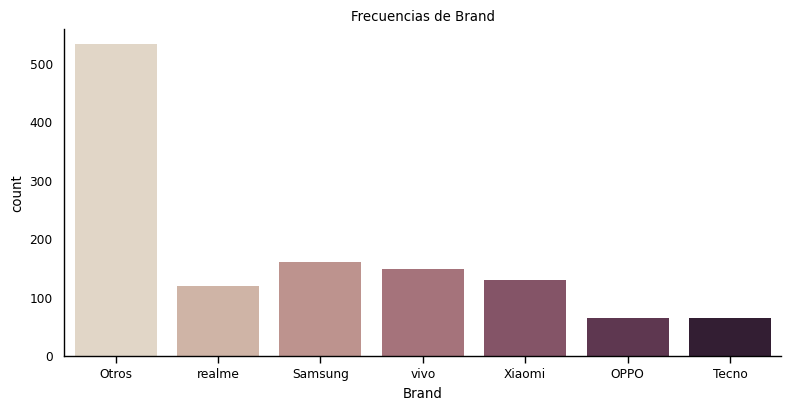

Proporciones de cada categoría antes de agrupar 'Otros' en Name:
 Name
Samsung Galaxy M21 2021 128GB    0.002461
AGM H5 Pro                       0.002461
Samsung Galaxy F12 128GB         0.002461
I Kall K525                      0.002461
I Kall K570                      0.002461
                                   ...   
OnePlus 10 Pro 256GB             0.000820
OPPO A55 4G                      0.000820
Samsung Galaxy A72               0.000820
vivo T2 8GB RAM                  0.000820
Zopo Speed 7                     0.000820
Name: count, Length: 1150, dtype: float64


<Figure size 400x100 with 0 Axes>

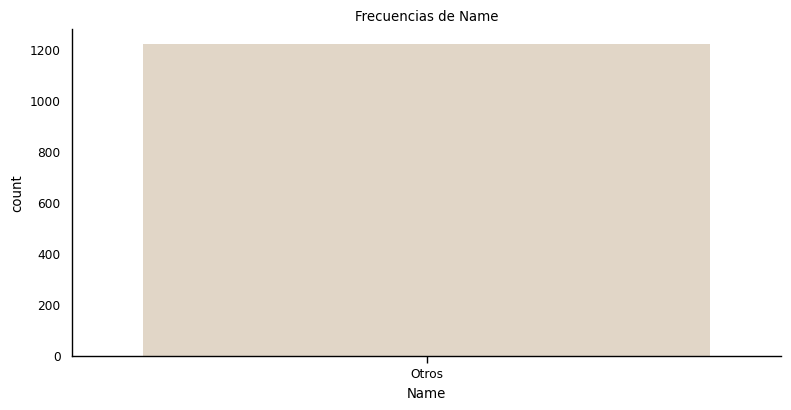

Proporciones de cada categoría antes de agrupar 'Otros' en Processor:
 Processor
MediaTek Helio G35                 0.031993
MediaTek Helio P35                 0.031993
Qualcomm Snapdragon 695            0.030353
Qualcomm Snapdragon 680            0.029532
MediaTek Helio G85                 0.027892
                                     ...   
MediaTek MT6755                    0.000820
MediaTek MT6752                    0.000820
Qualcomm Snapdragon 400 MSM8928    0.000820
MediaTek Dimensity 9000 Plus       0.000820
Qualcomm Snapdragon 480 Plus       0.000820
Name: count, Length: 171, dtype: float64


<Figure size 400x100 with 0 Axes>

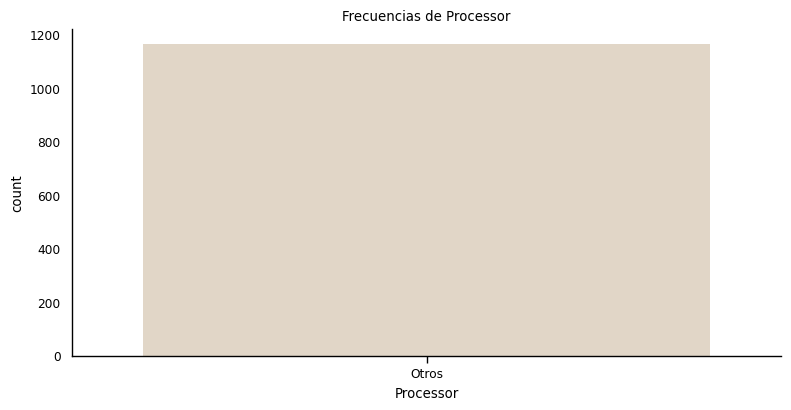

Proporciones de cada categoría antes de agrupar 'Otros' en Launch Date:
 Launch Date
September 9, 2022 (Official)     0.013126
September 17, 2021 (Official)    0.008203
October 2, 2021 (Official)       0.008203
July 26, 2021 (Official)         0.007383
September 22, 2022 (Official)    0.007383
                                   ...   
October 19, 2018 (Official)      0.000820
April 29, 2019 (Official)        0.000820
October 5, 2020 (Official)       0.000820
June 18, 2019 (Official)         0.000820
September 10, 2015 (Official)    0.000820
Name: count, Length: 640, dtype: float64


<Figure size 400x100 with 0 Axes>

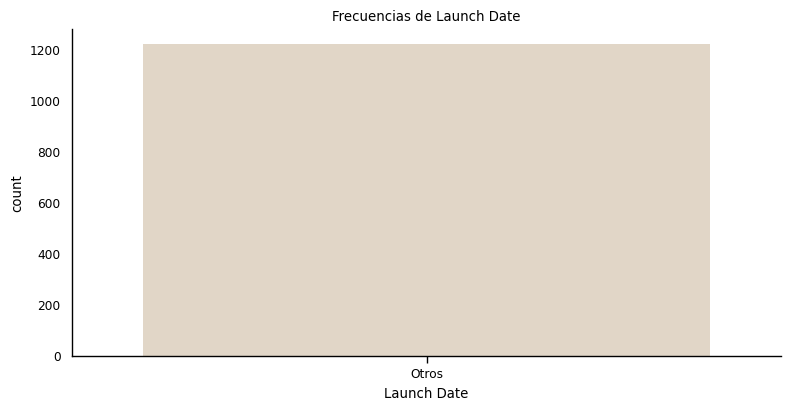

Proporciones de cada categoría antes de agrupar 'Otros' en Operating System:
 Operating System
Android v11                            0.261690
Android v12                            0.227235
Android v10 (Q)                        0.154225
Android v13                            0.077112
Android v9.0 (Pie)                     0.068089
Android v8.1 (Oreo)                    0.042658
Android v6.0 (Marshmallow)             0.029532
Android v7.0 (Nougat)                  0.027071
Android v5.1 (Lollipop)                0.020509
iOS v16                                0.011485
iOS v15                                0.010664
Android v8.0 (Oreo)                    0.007383
Android v7.1.1 (Nougat)                0.006563
iOS v14                                0.005742
Android v4.4 (Kitkat)                  0.004922
iOS v11                                0.003281
Android v4.4.2 (Kitkat)                0.003281
iOS v13.0                              0.003281
Android v7.1 (Nougat)                  0.

<Figure size 400x100 with 0 Axes>

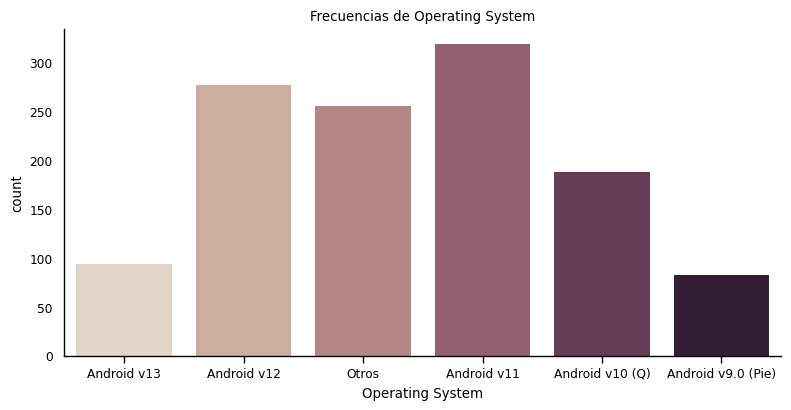

Proporciones de cada categoría antes de agrupar 'Otros' en Graphics:
 Graphics
PowerVR GE8320    0.118130
Mali-G57 MC2      0.070550
Mali-G52 MC2      0.063987
Adreno 610        0.055783
Adreno 619        0.040197
                    ...   
Adreno 225        0.000820
Mali-T830         0.000820
Mali-G52 MP2      0.000820
Adreno 619L       0.000820
Mali-T820 MP1     0.000820
Name: count, Length: 88, dtype: float64


<Figure size 400x100 with 0 Axes>

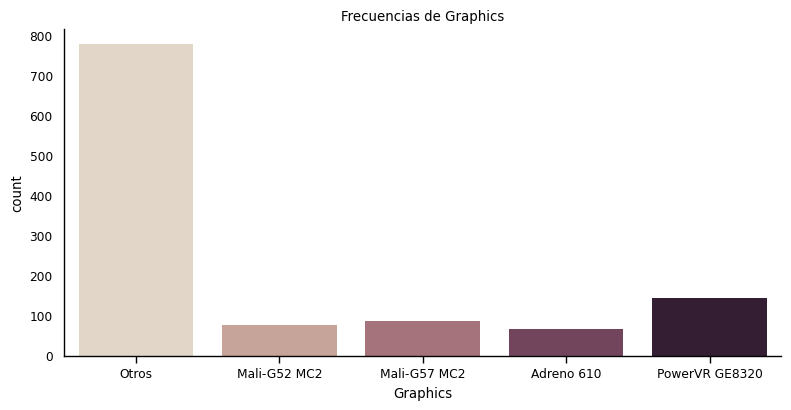

Proporciones de cada categoría antes de agrupar 'Otros' en Display Type:
 Display Type
IPS LCD               0.565217
AMOLED                0.147662
Super AMOLED          0.084495
OLED                  0.044299
PLS TFT LCD           0.029532
Dynamic AMOLED        0.029532
TFT                   0.022970
PLS LCD               0.022149
Fluid AMOLED          0.017227
P-OLED                0.010664
Super AMOLED Plus     0.007383
LCD                   0.004922
S-LCD                 0.004102
Super Fluid AMOLED    0.003281
Optic AMOLED          0.002461
LTPS LCD              0.000820
LTPO AMOLED           0.000820
S-LCD 3               0.000820
S-LCD 2               0.000820
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

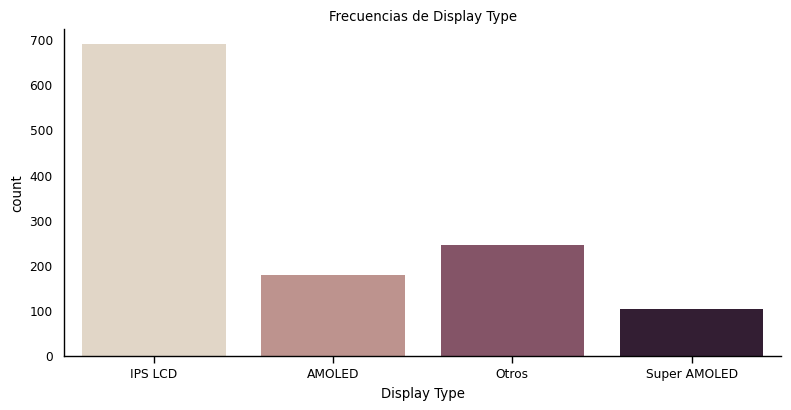

Proporciones de cada categoría antes de agrupar 'Otros' en Fingerprint Sensor:
 Fingerprint Sensor
Yes    0.827728
No     0.150123
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

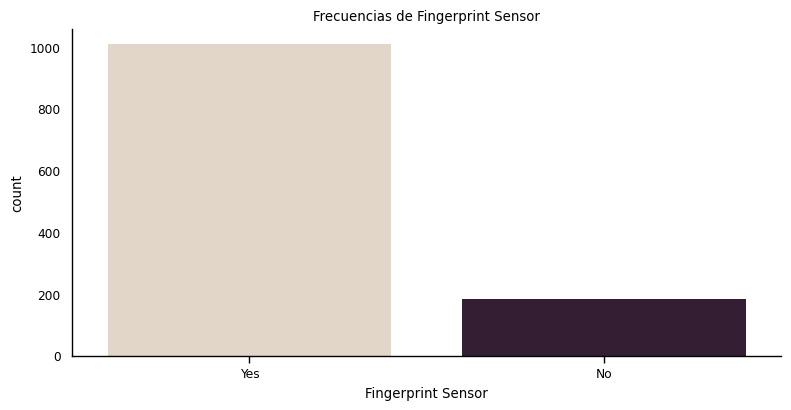

In [225]:
info_frecuencia(mobile_c)

In [228]:
mobile =mobile.applymap(lambda x: str(x))

# Función para extraer números
def extract_numeric_value(text):
    numeric_part = re.findall(r'[\d.,]+', text)  # Encuentra todos los números en el texto
    if numeric_part:
        return float(numeric_part[0].replace(',', ''))  # Devuelve el primer número encontrado como un flotante
    return None

# Función para extraer y convertir el número
def extract_number(text):
    numeric_part = ''.join(filter(str.isdigit, text))  # Extrae solo los dígitos
    return float(numeric_part) if numeric_part else None  # Convierte a flotante

# Aplicar la función para extraer números en la columna 'RAM'
mobile['RAM'] = mobile['RAM'].apply(lambda x: extract_numeric_value(x))
mobile['Battery'] = mobile['Battery'].apply(lambda x: extract_numeric_value(x))
mobile['Display'] = mobile['Display'].apply(lambda x: extract_numeric_value(x))
mobile['Capacity'] = mobile['Capacity'].apply(lambda x: extract_numeric_value(x))
mobile['Internal Memory'] = mobile['Internal Memory'].apply(lambda x: extract_numeric_value(x))
mobile['Price'] = mobile['Price'].apply(lambda x: extract_number(x))

mobile

,Brand,Name,RAM,Processor,Battery,Display,Launch Date,Operating System,Graphics,Display Type,Capacity,Internal Memory,Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8.0,Qualcomm Snapdragon 695,5000.0,6.72,"April 11, 2023 (Official)",Android v13,Adreno 619,IPS LCD,5000.0,128.0,Yes,19999000.0
1,realme,realme 10 Pro Plus 5G,6.0,MediaTek Dimensity 1080 MT6877V,5000.0,6.70,"December 8, 2022 (Official)",Android v13,Mali-G68 MC4,AMOLED,5000.0,128.0,Yes,24818000.0
2,realme,realme Narzo N53,4.0,Unisoc T612,5000.0,6.74,"May 22, 2023 (Official)",Android v13,Mali-G57,IPS LCD,5000.0,64.0,Yes,8999000.0
3,OnePlus,OnePlus 11R,8.0,Qualcomm Snapdragon 8 Plus Gen 1,5000.0,6.74,"February 21, 2023 (Official)",Android v13,Adreno 730,Super Fluid AMOLED,5000.0,128.0,Yes,39999000.0
4,POCO,POCO F5,8.0,Qualcomm Snapdragon 7 Plus Gen 2,5000.0,6.67,"May 10, 2023 (Official)",Android v13,Adreno 725,AMOLED,5000.0,256.0,Yes,29999000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Zopo,Zopo Speed 7 Plus,3.0,MediaTek MT6753,3000.0,5.50,"October 22, 2015 (Official)",Android v5.1 (Lollipop),Mali-T720 MP3,IPS LCD,3000.0,16.0,No,6300000.0
1217,Lava,Lava Iris Fuel F1,2.0,MediaTek MT6580,4000.0,5.00,"October 14, 2015 (Official)",Android v5.1 (Lollipop),Mali-400 MP,IPS LCD,4000.0,8.0,No,8700000.0
1218,Panasonic,Panasonic P65 Flash,1.0,MediaTek,2910.0,5.50,"October 12, 2015 (Official)",Android v5.1 (Lollipop),nan,IPS LCD,2910.0,8.0,nan,8830000.0
1219,Lava,Lava Iris X8,2.0,MediaTek MT6592M,2500.0,5.00,"February 12, 2015 (Official)",Android v4.4.2 (Kitkat),Mali-450 MP4,IPS LCD,2500.0,16.0,No,10500000.0


Proporciones de cada categoría antes de agrupar 'Otros' en Brand:
 Brand
Samsung       0.132075
vivo          0.122231
Xiaomi        0.105824
realme        0.097621
OPPO          0.053322
Tecno         0.052502
POCO          0.046760
Apple         0.037736
Infinix       0.036095
OnePlus       0.029532
Nokia         0.028712
Lava          0.027892
I             0.027071
Moto          0.026251
iQOO          0.023790
Micromax      0.013126
Google        0.013126
HTC           0.010664
Panasonic     0.008203
Karbonn       0.008203
Motorola      0.007383
Ulefone       0.007383
Doogee        0.006563
Itel          0.005742
Comio         0.004922
Hi-Tech       0.004922
Coolpad       0.004102
Gionee        0.004102
Zopo          0.004102
Oukitel       0.004102
Honor         0.003281
Blackview     0.003281
Asus          0.003281
Lenovo        0.003281
Yuho          0.003281
Huawei        0.003281
Zen           0.002461
Nothing       0.002461
AGM           0.002461
BlackZone     0.002461
Intex  

<Figure size 400x100 with 0 Axes>

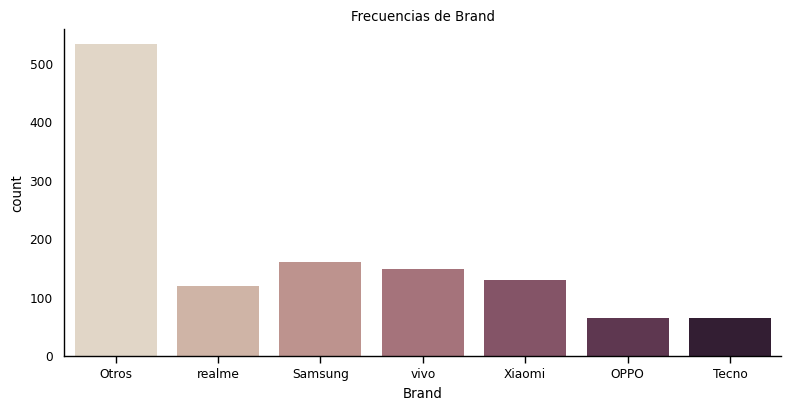

Proporciones de cada categoría antes de agrupar 'Otros' en Name:
 Name
Samsung Galaxy M21 2021 128GB    0.002461
AGM H5 Pro                       0.002461
Samsung Galaxy F12 128GB         0.002461
I Kall K525                      0.002461
I Kall K570                      0.002461
                                   ...   
OnePlus 10 Pro 256GB             0.000820
OPPO A55 4G                      0.000820
Samsung Galaxy A72               0.000820
vivo T2 8GB RAM                  0.000820
Zopo Speed 7                     0.000820
Name: count, Length: 1150, dtype: float64


<Figure size 400x100 with 0 Axes>

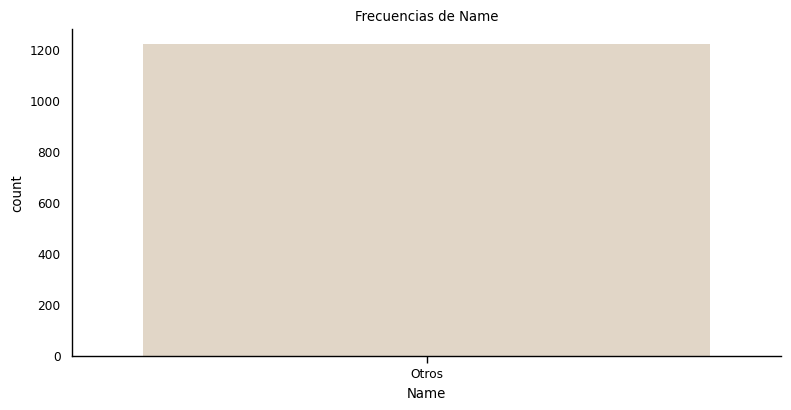

Proporciones de cada categoría antes de agrupar 'Otros' en Processor:
 Processor
nan                                0.045119
MediaTek Helio G35                 0.031993
MediaTek Helio P35                 0.031993
Qualcomm Snapdragon 695            0.030353
Qualcomm Snapdragon 680            0.029532
                                     ...   
MediaTek MT6752                    0.000820
MediaTek Dimensity 8100 MT6895Z    0.000820
Qualcomm Snapdragon 400 MSM8928    0.000820
Qualcomm Snapdragon 480 Plus       0.000820
Qualcomm Snapdragon 652 MSM8976    0.000820
Name: count, Length: 172, dtype: float64


<Figure size 400x100 with 0 Axes>

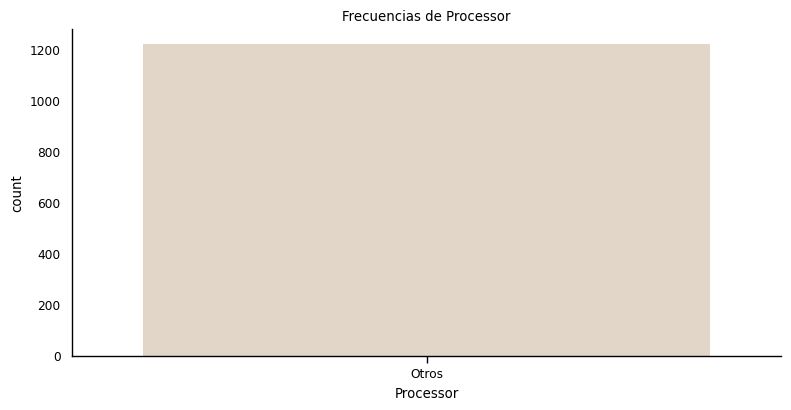

Proporciones de cada categoría antes de agrupar 'Otros' en Launch Date:
 Launch Date
September 9, 2022 (Official)     0.013126
September 17, 2021 (Official)    0.008203
October 2, 2021 (Official)       0.008203
July 26, 2021 (Official)         0.007383
September 22, 2022 (Official)    0.007383
                                   ...   
October 19, 2018 (Official)      0.000820
April 29, 2019 (Official)        0.000820
October 5, 2020 (Official)       0.000820
June 18, 2019 (Official)         0.000820
September 10, 2015 (Official)    0.000820
Name: count, Length: 640, dtype: float64


<Figure size 400x100 with 0 Axes>

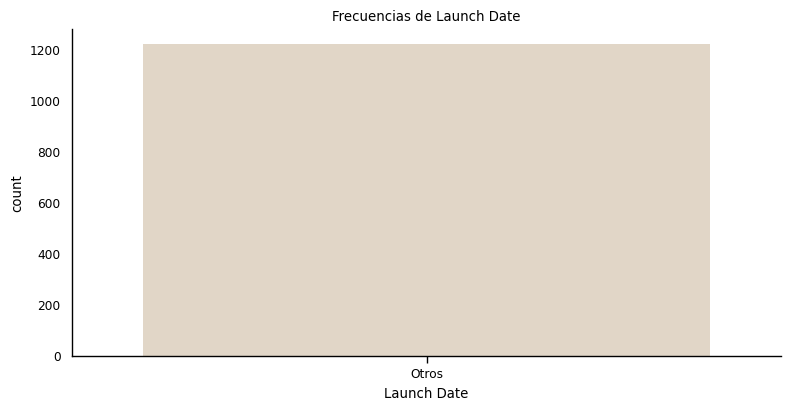

Proporciones de cada categoría antes de agrupar 'Otros' en Operating System:
 Operating System
Android v11                            0.261690
Android v12                            0.227235
Android v10 (Q)                        0.154225
Android v13                            0.077112
Android v9.0 (Pie)                     0.068089
Android v8.1 (Oreo)                    0.042658
Android v6.0 (Marshmallow)             0.029532
Android v7.0 (Nougat)                  0.027071
Android v5.1 (Lollipop)                0.020509
iOS v16                                0.011485
iOS v15                                0.010664
Android v8.0 (Oreo)                    0.007383
Android v7.1.1 (Nougat)                0.006563
iOS v14                                0.005742
Android v4.4 (Kitkat)                  0.004922
iOS v11                                0.003281
iOS v13.0                              0.003281
Android v4.4.2 (Kitkat)                0.003281
Android v6.0.1 (Marshmallow)           0.

<Figure size 400x100 with 0 Axes>

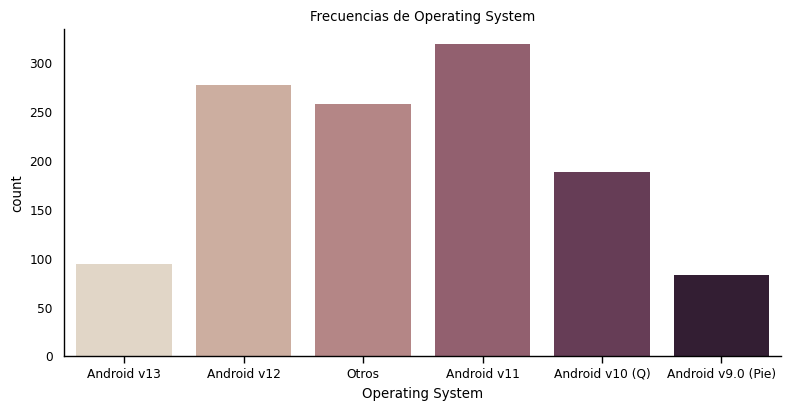

Proporciones de cada categoría antes de agrupar 'Otros' en Graphics:
 Graphics
PowerVR GE8320    0.118130
Mali-G57 MC2      0.070550
Mali-G52 MC2      0.063987
Adreno 610        0.055783
nan               0.053322
                    ...   
Adreno 225        0.000820
Mali-T830         0.000820
Mali-G52 MP2      0.000820
Adreno 619L       0.000820
Mali-T820 MP1     0.000820
Name: count, Length: 89, dtype: float64


<Figure size 400x100 with 0 Axes>

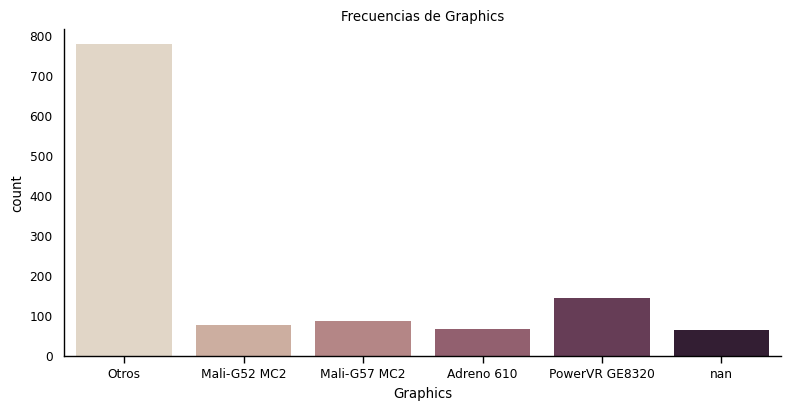

Proporciones de cada categoría antes de agrupar 'Otros' en Display Type:
 Display Type
IPS LCD               0.565217
AMOLED                0.147662
Super AMOLED          0.084495
OLED                  0.044299
PLS TFT LCD           0.029532
Dynamic AMOLED        0.029532
TFT                   0.022970
PLS LCD               0.022149
Fluid AMOLED          0.017227
P-OLED                0.010664
Super AMOLED Plus     0.007383
LCD                   0.004922
S-LCD                 0.004102
Super Fluid AMOLED    0.003281
Optic AMOLED          0.002461
LTPS LCD              0.000820
LTPO AMOLED           0.000820
nan                   0.000820
S-LCD 3               0.000820
S-LCD 2               0.000820
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

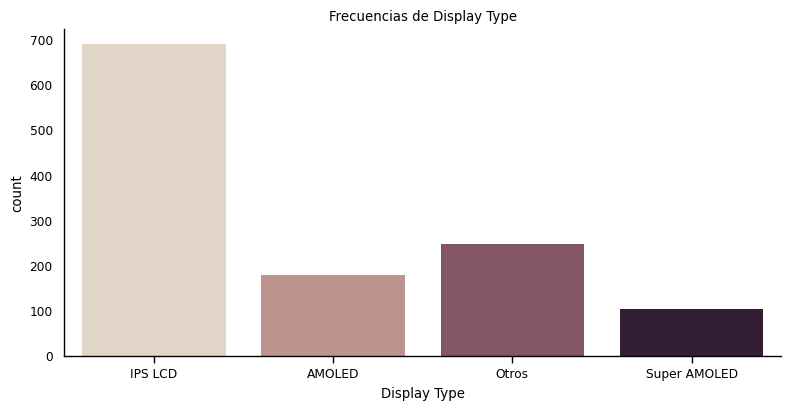

Proporciones de cada categoría antes de agrupar 'Otros' en Fingerprint Sensor:
 Fingerprint Sensor
Yes    0.827728
No     0.150123
nan    0.022149
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

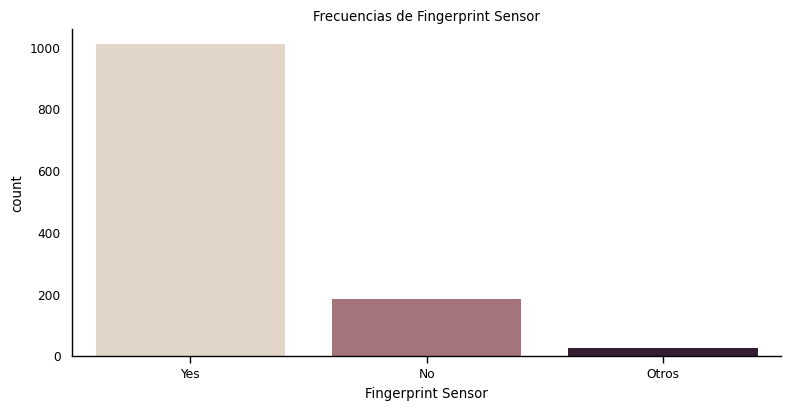

In [229]:
info_frecuencia(mobile)

In [230]:
mobile

,Brand,Name,RAM,Processor,Battery,Display,Launch Date,Operating System,Graphics,Display Type,Capacity,Internal Memory,Fingerprint Sensor,Price
0,OnePlus,OnePlus Nord CE 3 Lite 5G,8.0,Qualcomm Snapdragon 695,5000.0,6.72,"April 11, 2023 (Official)",Android v13,Adreno 619,IPS LCD,5000.0,128.0,Yes,19999000.0
1,realme,realme 10 Pro Plus 5G,6.0,MediaTek Dimensity 1080 MT6877V,5000.0,6.70,"December 8, 2022 (Official)",Android v13,Mali-G68 MC4,AMOLED,5000.0,128.0,Yes,24818000.0
2,realme,realme Narzo N53,4.0,Unisoc T612,5000.0,6.74,"May 22, 2023 (Official)",Android v13,Mali-G57,IPS LCD,5000.0,64.0,Yes,8999000.0
3,OnePlus,OnePlus 11R,8.0,Qualcomm Snapdragon 8 Plus Gen 1,5000.0,6.74,"February 21, 2023 (Official)",Android v13,Adreno 730,Super Fluid AMOLED,5000.0,128.0,Yes,39999000.0
4,POCO,POCO F5,8.0,Qualcomm Snapdragon 7 Plus Gen 2,5000.0,6.67,"May 10, 2023 (Official)",Android v13,Adreno 725,AMOLED,5000.0,256.0,Yes,29999000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Zopo,Zopo Speed 7 Plus,3.0,MediaTek MT6753,3000.0,5.50,"October 22, 2015 (Official)",Android v5.1 (Lollipop),Mali-T720 MP3,IPS LCD,3000.0,16.0,No,6300000.0
1217,Lava,Lava Iris Fuel F1,2.0,MediaTek MT6580,4000.0,5.00,"October 14, 2015 (Official)",Android v5.1 (Lollipop),Mali-400 MP,IPS LCD,4000.0,8.0,No,8700000.0
1218,Panasonic,Panasonic P65 Flash,1.0,MediaTek,2910.0,5.50,"October 12, 2015 (Official)",Android v5.1 (Lollipop),nan,IPS LCD,2910.0,8.0,nan,8830000.0
1219,Lava,Lava Iris X8,2.0,MediaTek MT6592M,2500.0,5.00,"February 12, 2015 (Official)",Android v4.4.2 (Kitkat),Mali-450 MP4,IPS LCD,2500.0,16.0,No,10500000.0
